In [1]:
# Importing Pacakages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("D:\Learnbay DSC Course\DS (ML Project) 8th feb 2024\Bengaluru_House_Data.csv" , encoding='unicode_escape')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00


In [3]:
# Dataset structure 

data.shape

(13320, 9)

In [4]:
# Information on data set 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  object 
dtypes: float64(2), object(7)
memory usage: 936.7+ KB


In [5]:
# Find Missing Values 

data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
data.isnull().sum()/len(data)*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

We can see that 41% of data is missing in Variable Society and hence that varible can be dropped We also find missing data in 'Location' , 'size' , 'bath' and 'Balcony' which needs to be handled by imputation

In [7]:
# Handling Missing data 
df = data.copy()

In [8]:
df = df.drop(['society'] , axis = 1)
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,$51.00


In [9]:
# Missing data in feature location 
df['location'].dtype
# location is an object type data , hence finding the most frequent value and fillign missing value with mode 

dtype('O')

In [10]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [11]:
df['location'] = df['location'].fillna('Whitefield')

In [12]:
# Size feature 

print(df['size'].dtype)
print(df['size'].value_counts())

object
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64


In [13]:
df['size'] = df['size'].fillna('2 BHK')

In [14]:
# Bath 

print(df['bath'].dtype)

float64


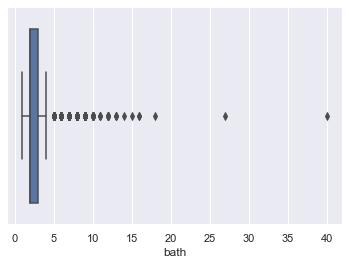

In [15]:
# Checking for outliers through box for the feature bath , based on which missing values can be impute by mean or median 
sns.boxplot(df['bath'])
plt.show()

In [16]:
print(df['bath'].mean())
print(df['bath'].median())

2.6926096474673513
2.0


In [17]:
df['bath'] = df['bath'].fillna(df['bath'].median())

In [18]:
# Balcony
df['balcony'].dtype

dtype('float64')

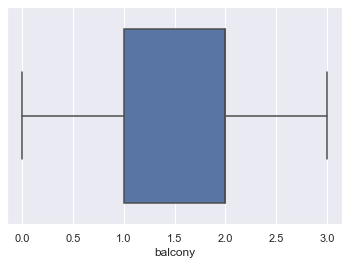

In [19]:
sns.boxplot(df['balcony'])
plt.show()

In [20]:
print(df['balcony'].mean())
print(df['balcony'].median())

1.5843757375501535
2.0


In [21]:
df['balcony'] = df['balcony'].fillna(df['balcony'].median())

In [22]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

All missing values are handled

In [23]:
# To check if there are any unexpected patterns in data in each columns 

for i in df.columns:
    print('*******************' , i , 
          '******************************')
    print()
    print(set(df[i].tolist()))

******************* area_type ******************************

{'Plot  Area', 'Carpet  Area', 'Super built-up  Area', 'Built-up  Area'}
******************* availability ******************************

{'19-May', '19-Apr', '21-Jun', '21-Dec', '16-Sep', '16-Mar', '15-Jun', '18-Aug', 'Immediate Possession', '18-Jul', '17-Aug', '16-Jul', '22-May', '17-Dec', '22-Nov', '21-Jul', '22-Jan', '21-Aug', '16-Dec', '20-Jul', 'Ready To Move', '18-Sep', '20-Jun', '19-Aug', '14-Jul', '19-Jun', '17-Feb', '18-May', '18-Jan', '19-Oct', '21-Jan', '20-Jan', '20-May', '19-Sep', '21-Feb', '18-Nov', '17-Jan', '19-Nov', '20-Feb', '17-Jun', '20-Apr', '19-Feb', '19-Jul', '20-Dec', '19-Dec', '21-Oct', '22-Jun', '16-Jan', '18-Mar', '21-May', '20-Aug', '16-Oct', '17-Sep', '20-Sep', '20-Nov', '18-Jun', '19-Jan', '19-Mar', '17-Mar', '21-Nov', '20-Oct', '18-Feb', '20-Mar', '15-Dec', '21-Sep', '16-Nov', '18-Dec', '17-May', '17-Nov', '18-Oct', '22-Mar', '17-Apr', '15-Aug', '22-Dec', '14-Nov', '21-Mar', '15-Oct', '17-Jul'

In [24]:
df['availability']

0               19-Dec
1        Ready To Move
2        Ready To Move
3        Ready To Move
4        Ready To Move
             ...      
13315    Ready To Move
13316    Ready To Move
13317    Ready To Move
13318           18-Jun
13319    Ready To Move
Name: availability, Length: 13320, dtype: object

In [25]:
df['availability'] = np.where(df['availability'] == 'Immediate Possession' , df['availability'] ,
                               np.where(df['availability'] == 'Ready To Move' , df['availability'] ,
                                         'Under Construction'))

In [26]:
df['availability'].value_counts()

Ready To Move           10581
Under Construction       2723
Immediate Possession       16
Name: availability, dtype: int64

In [27]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [28]:
s = '2 Bedroom'
m = int(s.split(' ')[0])
m

2

In [29]:
df['bedrooms'] = df['size'].apply(lambda x : int(x.split(' ')[0]))
df['bedrooms'].value_counts()

2     5544
3     4857
4     1417
1      656
5      356
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: bedrooms, dtype: int64

In [30]:
df['location'].value_counts()

Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [31]:
x = ' 1st Stage Radha Krishna Layout '
x.strip()

'1st Stage Radha Krishna Layout'

In [32]:
df['location'] = df['location'].apply(lambda x : x.strip())

In [33]:
location_counts = df['location'].value_counts()
location_counts

Whitefield                        542
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1294, dtype: int64

In [34]:
# Picking locations which have less than 10 data points and naming them as other locations 
location_counts[location_counts.values <= 10]

Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1053, dtype: int64

In [35]:
other_location = location_counts[location_counts.values <= 10].index
other_location

Index(['Dairy Circle', 'Nagappa Reddy Layout', 'Basapura',
       '1st Block Koramangala', 'Sector 1 HSR Layout', 'Gunjur Palya',
       'Naganathapura', 'BTM 1st Stage', 'Nagadevanahalli', 'Dodsworth Layout',
       ...
       'Vidyapeeta', 'Maruthi Extension', 'Okalipura', 'Old Town',
       'Vasantapura main road', 'Bapuji Layout',
       '1st Stage Radha Krishna Layout', 'BEML Layout 5th stage',
       'singapura paradise', 'Abshot Layout'],
      dtype='object', length=1053)

In [36]:
df['location'] = df['location'].apply(lambda x : 'others' if x in other_location else x)
df['location'].value_counts()

others                2885
Whitefield             542
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

In [37]:
df['total_sqft'].dtype

dtype('O')

In [38]:
s = '850 - 1060'
s.split('-')
m = s.split('-')
(float(m[0]) + float(m[1])) / 2

955.0

In [39]:
def average(x) :
    m = x.split('-')
    if len(m) == 2 :
        avg = (float(m[0]) + float(m[1]))/2
        return avg
    try :
        return float(x)
    except :
        return(x)

In [40]:
df['total_sqft'] = df['total_sqft'].apply(average)

In [41]:
print(set(df['total_sqft'].tolist()))

{1.0, 5.0, 11.0, 15.0, 24.0, 45.0, 60.0, '315Sq. Yards', 8321.0, 8400.0, 250.0, 276.0, 284.0, 296.0, 300.0, 1688.12, 302.0, 8500.0, 315.0, 1691.2, 340.0, 350.0, 351.0, 360.0, 375.0, 381.0, 395.0, 396.0, 400.0, 410.0, 412.5, 416.0, 418.0, 420.0, 425.0, 26136.0, 432.0, 435.0, 440.0, 445.0, 450.0, 451.0, 456.0, 458.0, 460.0, 461.82, 462.0, 469.0, 470.0, 475.0, 480.0, 485.0, 488.0, 492.0, 497.0, 499.0, 500.0, 502.0, 505.0, 509.0, 510.0, 515.0, 516.0, 520.0, 1732.5, 524.0, 525.0, 527.0, 1733.5, 530.0, 532.0, 534.0, 535.0, 539.0, 540.0, 545.0, 550.0, 551.0, 552.0, 552.5, 555.0, 560.0, '24Sq. Meter', 565.0, 567.0, 570.0, 575.0, 580.0, 581.91, 582.5, 583.0, 581.0, 585.0, 588.0, 589.0, 590.0, 595.0, 596.0, 600.0, 602.0, 605.0, 606.0, 607.0, 610.0, 612.0, 612.5, 614.5, 615.0, 616.0, 614.0, 613.0, 620.0, 621.0, 623.0, 624.0, 625.0, 627.0, 628.0, 630.0, 630.5, 633.0, 635.0, 638.0, 640.0, '1100Sq. Meter', 644.0, 645.0, 646.0, 648.0, 649.5, 650.0, 651.0, 8840.0, 654.0, 655.0, 656.0, 657.5, 658.0, 66

In [42]:
str_type =[]
for i in df['total_sqft'] :
    if type(i) == str :
        str_type.append(i)
str_type

['34.46Sq. Meter',
 '4125Perch',
 '1000Sq. Meter',
 '1100Sq. Yards',
 '5.31Acres',
 '30Acres',
 '716Sq. Meter',
 '1500Sq. Meter',
 '142.61Sq. Meter',
 '1574Sq. Yards',
 '361.33Sq. Yards',
 '117Sq. Yards',
 '3040Sq. Meter',
 '500Sq. Yards',
 '167Sq. Meter',
 '315Sq. Yards',
 '3Cents',
 '188.89Sq. Yards',
 '204Sq. Meter',
 '45Sq. Yards',
 '133.3Sq. Yards',
 '78.03Sq. Meter',
 '122Sq. Yards',
 '84.53Sq. Meter',
 '2.09Acres',
 '24Guntha',
 '697Sq. Meter',
 '142.61Sq. Meter',
 '1500Cents',
 '132Sq. Yards',
 '2Acres',
 '1100Sq. Meter',
 '15Acres',
 '1.26Acres',
 '151.11Sq. Yards',
 '1Grounds',
 '2940Sq. Yards',
 '45.06Sq. Meter',
 '1.25Acres',
 '86.72Sq. Meter',
 '38Guntha',
 '6Acres',
 '120Sq. Yards',
 '24Sq. Meter',
 '142.84Sq. Meter',
 '300Sq. Yards']

In [43]:
len(str_type)

46

In [44]:
import re
sample_str = '34.46Sq. Meter'
num = re.findall(r'\d+\.\d*',sample_str)
num

['34.46']

Conversions to Sqft 

* 1 Sq. Meter = 10.7639 Sqft
* 1 Perch = 272.25 Sqft
* 1 Sq. Yards = 9 Sqft
* 1 Acre = 43560 Sqft
* 1 Guntha = 1089 Sqft 
* 1 Grounds = 2400 Sqft
* 1 Cents = 435.56

In [45]:
# Creating a dictionary to stor the conversion values 
conv_dict = {'Sq. Meter': 10.7639, 'Perch':272.25, 'Sq. Yards':9,
     'Acres':43560,'Guntha':1089,'Grounds':2400.35 , 'Cents':435.56}

"|".join(conv_dict)

'Sq. Meter|Perch|Sq. Yards|Acres|Guntha|Grounds|Cents'

In [46]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price', 'bedrooms'],
      dtype='object')

In [47]:
df['total_sqft'] = df['total_sqft'].astype(str)
df['total_sqft'].dtype

dtype('O')

In [48]:
df['new_sqft'] = df['total_sqft'].str.extract('(\d+\.*\d*)', expand = True).astype(float)

In [49]:
df.head(20)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bedrooms,new_sqft
0,Super built-up Area,Under Construction,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,$39.07,2,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,$120.00,4,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,$62.00,3,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,$95.00,3,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,$51.00,2,1200.0
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170.0,2.0,1.0,$38.00,2,1170.0
6,Super built-up Area,Under Construction,Old Airport Road,4 BHK,2732.0,4.0,2.0,$204.00,4,2732.0
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,3300.0,4.0,2.0,$600.00,4,3300.0
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,1310.0,3.0,1.0,$63.25,3,1310.0
9,Plot Area,Ready To Move,others,6 Bedroom,1020.0,6.0,2.0,$370.00,6,1020.0


In [50]:
df['units'] = df['total_sqft'].str.extract('(Sq. Meter|Perch|Sq. Yards|Acres|Guntha|Grounds|Cents)' , expand = True)
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bedrooms,new_sqft,units
0,Super built-up Area,Under Construction,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,$39.07,2,1056.0,NaN
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,$120.00,4,2600.0,NaN
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,$62.00,3,1440.0,NaN
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,$95.00,3,1521.0,NaN
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,$51.00,2,1200.0,NaN


In [51]:
df['units'].isnull().sum()/len(df['units'])

0.9965465465465465

The NaN values here in units column mean they are the units in SqFt 

In [52]:
df.loc[df['units'] == ('Acres')]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bedrooms,new_sqft,units
1019,Plot Area,Under Construction,others,1 Bedroom,5.31Acres,1.0,0.0,110,1,5.31,Acres
1086,Plot Area,Under Construction,others,2 Bedroom,30Acres,2.0,2.0,29.5,2,30.00,Acres
6333,Plot Area,Ready To Move,others,2 Bedroom,2.09Acres,2.0,0.0,200,2,2.09,Acres
7334,Plot Area,Ready To Move,Kanakpura Road,1 Bedroom,2Acres,1.0,0.0,125,1,2.00,Acres
7607,Plot Area,Ready To Move,Bommenahalli,3 Bedroom,15Acres,3.0,1.0,217,3,15.00,Acres
7726,Plot Area,Ready To Move,Kanakpura Road,1 Bedroom,1.26Acres,1.0,0.0,125,1,1.26,Acres
10488,Plot Area,Ready To Move,others,2 Bedroom,1.25Acres,2.0,2.0,200,2,1.25,Acres
11615,Plot Area,Ready To Move,others,3 Bedroom,6Acres,2.0,0.0,80,3,6.00,Acres


Per the conversion chart , 

1 Acre = 43560 Sqft
So if we try to convert them say for example 
30 Acres into Sqft would be 1306800
or 
even 1 acr into sqft would be 43560 which is very unlikey for a residential plot 


Similarily 
1 Perch = 272 Sqft
4125 Perch = 1122000

This is also unlikey for a residential plot 

And when we analyse the amount of these extreme values in different units in the data , we see that 
there are 13274 data poitns in sqft and 46 Points with other units 
Meaning 99% data points are in Sqft , hence removing the other data points



In [53]:
specific_units = ['Sq. Meter','Perch','Sq. Yards','Acres','Guntha','Grounds','Cents']
filtered_units = (df[df['units'].isin(specific_units)])
filtered_units

,area_type,availability,location,size,total_sqft,bath,balcony,price,bedrooms,new_sqft,units
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.5,1,34.46,Sq. Meter
648,Built-up Area,Ready To Move,Arekere,9 Bedroom,4125Perch,9.0,2.0,265,9,4125.00,Perch
775,Built-up Area,Ready To Move,others,1 BHK,1000Sq. Meter,2.0,1.0,93,1,1000.00,Sq. Meter
872,Super built-up Area,Ready To Move,others,2 BHK,1100Sq. Yards,2.0,2.0,45,2,1100.00,Sq. Yards
1019,Plot Area,Under Construction,others,1 Bedroom,5.31Acres,1.0,0.0,110,1,5.31,Acres
1086,Plot Area,Under Construction,others,2 Bedroom,30Acres,2.0,2.0,29.5,2,30.00,Acres
1400,Super built-up Area,Ready To Move,Chamrajpet,9 BHK,716Sq. Meter,9.0,1.0,296,9,716.00,Sq. Meter
1712,Plot Area,Ready To Move,others,3 Bedroom,1500Sq. Meter,3.0,1.0,95,3,1500.00,Sq. Meter
1743,Super built-up Area,Under Construction,Hosa Road,3 BHK,142.61Sq. Meter,3.0,1.0,115,3,142.61,Sq. Meter
1821,Plot Area,Ready To Move,Sarjapur,3 Bedroom,1574Sq. Yards,3.0,1.0,76,3,1574.00,Sq. Yards


In [54]:
df.shape

(13320, 11)

In [55]:
#Removing rows with units other than sqft 
df.drop(filtered_units.index , inplace = True)

In [56]:
df.shape

(13274, 11)

In [57]:
df.head(20)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bedrooms,new_sqft,units
0,Super built-up Area,Under Construction,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,$39.07,2,1056.0,NaN
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,$120.00,4,2600.0,NaN
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,$62.00,3,1440.0,NaN
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,$95.00,3,1521.0,NaN
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,$51.00,2,1200.0,NaN
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170.0,2.0,1.0,$38.00,2,1170.0,NaN
6,Super built-up Area,Under Construction,Old Airport Road,4 BHK,2732.0,4.0,2.0,$204.00,4,2732.0,NaN
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,3300.0,4.0,2.0,$600.00,4,3300.0,NaN
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,1310.0,3.0,1.0,$63.25,3,1310.0,NaN
9,Plot Area,Ready To Move,others,6 Bedroom,1020.0,6.0,2.0,$370.00,6,1020.0,NaN


In [58]:
# Removing units column

df = df.drop(['units'] , axis = 1)
df.shape

(13274, 10)

In [59]:
df['total_sqft'].dtype

dtype('O')

In [60]:
df['new_sqft'].dtype

dtype('float64')

In [61]:
# Check for outliers ,

def boxplots(col):
    sns.boxplot(df[col])
    plt.show()

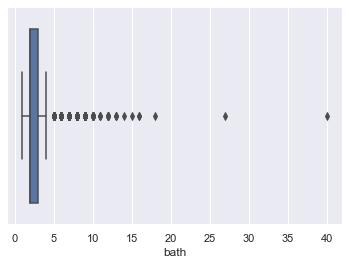

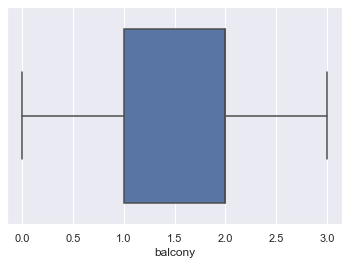

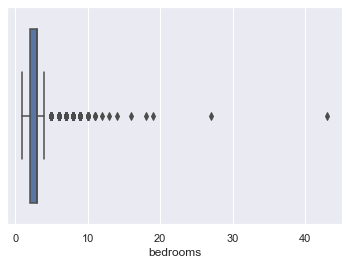

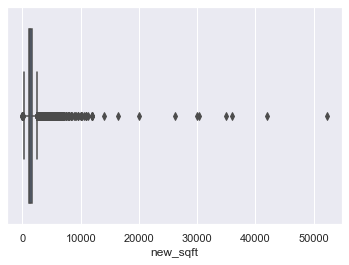

In [62]:
for i in df.select_dtypes(exclude = 'object' ).columns :
    boxplots(i)

In [63]:
# No of Bedrooms 
df['bedrooms'].describe()

count    13274.000000
mean         2.801718
std          1.291591
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         43.000000
Name: bedrooms, dtype: float64

In [64]:
# Average size of a bedroom can be comsidered to be around 250 Sqft 
# So if we have a 2 BHK , then minimum sqft would be around 500 Sqft 
# What if the data has points which have total_sqft that are less than the min value but still quote 2 Bhk or so ,
# Checking such patterns 

In [65]:
df[df['new_sqft'] / df['bedrooms'] < 250]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bedrooms,new_sqft
9,Plot Area,Ready To Move,others,6 Bedroom,1020.0,6.0,2.0,$370.00,6,1020.0
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600.0,9.0,2.0,200,8,600.0
58,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150,6,1407.0
68,Plot Area,Ready To Move,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85,8,1350.0
70,Plot Area,Ready To Move,others,3 Bedroom,500.0,3.0,2.0,100,3,500.0
...,...,...,...,...,...,...,...,...,...,...
13221,Plot Area,Ready To Move,others,9 Bedroom,1178.0,9.0,1.0,75,9,1178.0
13277,Plot Area,Ready To Move,others,7 Bedroom,1400.0,7.0,2.0,218,7,1400.0
13279,Plot Area,Ready To Move,others,6 Bedroom,1200.0,5.0,2.0,130,6,1200.0
13303,Plot Area,Ready To Move,Vidyaranyapura,5 Bedroom,774.0,5.0,3.0,70,5,774.0


<!-- We can observe few data points such as 
* 6 BHK house but total area of house is 1020 Sqft which does not make actual sense
* 5 BHK house with total area of house 774 Sqft 
* 3 BHK house with total area of house as 500 Sq ft 

 Such patterns can be treated as outliers and removed  -->

In [66]:
df1 = df.copy()
df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bedrooms,new_sqft
0,Super built-up Area,Under Construction,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,$39.07,2,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,$120.00,4,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,$62.00,3,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,$95.00,3,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,$51.00,2,1200.0


In [67]:
filtered_bedrooms = df1[df1['new_sqft']/df1['bedrooms'] <250]
filtered_bedrooms.shape

(612, 10)

In [68]:
df1.shape
#612 outliers will be removed from the data 

(13274, 10)

In [69]:
df1.drop(filtered_bedrooms.index , inplace = True)

In [70]:
df1.shape

(12662, 10)

In [71]:
df1['price'].unique().tolist()

[' $39.07 ',
 ' $120.00 ',
 ' $62.00 ',
 ' $95.00 ',
 ' $51.00 ',
 ' $38.00 ',
 ' $204.00 ',
 ' $600.00 ',
 ' $63.25 ',
 ' $70.00 ',
 ' $295.00 ',
 ' $40.00 ',
 ' 148-150 ',
 ' $73.50 ',
 ' $48.00 ',
 ' $60.00 ',
 ' $290.00 ',
 ' $15.00 ',
 ' $122.00 ',
 ' $380.00 ',
 ' $103.00 ',
 ' 25.25-30 ',
 '56',
 '23.1',
 '81',
 '48.77',
 '47',
 '186',
 '35',
 '123',
 '57.39',
 '125',
 '36',
 '45.5',
 '56.12',
 '45',
 '38',
 '48',
 '91.79',
 '33',
 '94.82',
 '130',
 '50',
 '99',
 '91',
 '75',
 '44',
 '192',
 '185',
 '240',
 '55',
 '650',
 '140',
 '62',
 '43',
 '57',
 '36.68',
 '80.58',
 '101',
 '70',
 '48.23',
 '40',
 '205',
 '250',
 ' ? 105.00 ',
 ' ? 224.50 ',
 ' ? 78.00 ',
 ' ? 60.80 ',
 ' ? 102.00 ',
 ' ? 210.00 ',
 ' ? 88.00 ',
 ' ? 37.00 ',
 ' ? 58.06 ',
 ' ? 70.00 ',
 ' ? 28.88 ',
 ' ? 155.00 ',
 ' ? 80.00 ',
 ' ? 90.00 ',
 ' ? 245.00 ',
 ' ? 48.00 ',
 ' ? 65.00 ',
 ' ? 138.00 ',
 ' ? 17.00 ',
 ' ? 150.00 ',
 ' ? 43.00 ',
 ' ? 50.00 ',
 ' ? 49.90 ',
 ' ? 98.00 ',
 ' ? 229.00 ',
 ' ? 55.68

In [72]:
df1['price'] = df1['price'].apply(average)
df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bedrooms,new_sqft
0,Super built-up Area,Under Construction,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,$39.07,2,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,$120.00,4,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,$62.00,3,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,$95.00,3,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,$51.00,2,1200.0


In [73]:
df1['price'] = df1['price'].astype(str)

In [74]:
df1['price'] = df1['price'].str.extract('(\d+\.*\d*)', expand = True).astype(float)
df1['price'].unique().tolist()

[39.07,
 120.0,
 62.0,
 95.0,
 51.0,
 38.0,
 204.0,
 600.0,
 63.25,
 70.0,
 295.0,
 40.0,
 149.0,
 73.5,
 48.0,
 60.0,
 290.0,
 15.0,
 122.0,
 380.0,
 103.0,
 27.625,
 56.0,
 23.1,
 81.0,
 48.77,
 47.0,
 186.0,
 35.0,
 123.0,
 57.39,
 125.0,
 36.0,
 45.5,
 56.12,
 45.0,
 91.79,
 33.0,
 94.82,
 130.0,
 50.0,
 99.0,
 91.0,
 75.0,
 44.0,
 192.0,
 185.0,
 240.0,
 55.0,
 650.0,
 140.0,
 43.0,
 57.0,
 36.68,
 80.58,
 101.0,
 48.23,
 205.0,
 250.0,
 105.0,
 224.5,
 78.0,
 60.8,
 102.0,
 210.0,
 88.0,
 37.0,
 58.06,
 28.88,
 155.0,
 80.0,
 90.0,
 245.0,
 65.0,
 138.0,
 17.0,
 150.0,
 49.9,
 98.0,
 229.0,
 55.68,
 66.78,
 51.91,
 45.9,
 225.0,
 64.0,
 74.75,
 477.0,
 68.52,
 34.0,
 54.0,
 110.0,
 16.5,
 83.0,
 54.01,
 50.4,
 85.05,
 213.0,
 43.76,
 46.74,
 91.31,
 58.0,
 235.0,
 30.6,
 135.0,
 145.0,
 760.0,
 32.0,
 420.0,
 175.0,
 43.49,
 64.5,
 11.0,
 100.0,
 14.0,
 67.0,
 52.0,
 300.0,
 55.7,
 46.0,
 56.8,
 325.0,
 115.0,
 82.0,
 47.6,
 53.0,
 48.7,
 87.0,
 43.5,
 190.0,
 428.0,
 89.0,
 78.2

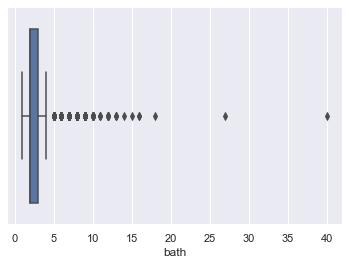

In [75]:
# Bathroom 

sns.boxplot(df['bath'])
plt.show()

It is unlikely to have more number of bathrooms than bedrooms in any property,

Never the less we can asuume there might be 1 attached bath for each bedroom and 1-2 common bath 

Creating such relation any 
no of bathrooms > ((no of bedrooms) + 1) can be treated as outlier since it is unlikely most of the times to have such condition in real case 

In [76]:
df1[df1['bath'] > (df1['bedrooms'] + 1)]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bedrooms,new_sqft
84,Super built-up Area,Ready To Move,EPIP Zone,3 BHK,1499.0,5.0,2.0,102.0,3,1499.0
209,Plot Area,Ready To Move,Padmanabhanagar,4 Bedroom,1736.0,6.0,0.0,190.0,4,1736.0
337,Super built-up Area,Ready To Move,Thigalarapalya,4 BHK,3122.0,6.0,2.0,230.0,4,3122.0
490,Super built-up Area,Ready To Move,Old Madras Road,5 BHK,4500.0,7.0,3.0,337.0,5,4500.0
524,Super built-up Area,Under Construction,Jakkur,4 BHK,5230.0,6.0,1.0,465.0,4,5230.0
...,...,...,...,...,...,...,...,...,...,...
13092,Super built-up Area,Ready To Move,Hebbal,4 BHK,4000.0,6.0,1.0,440.0,4,4000.0
13095,Super built-up Area,Ready To Move,others,4 BHK,6652.0,6.0,1.0,660.0,4,6652.0
13119,Plot Area,Ready To Move,others,4 Bedroom,6688.0,6.0,1.0,700.0,4,6688.0
13180,Super built-up Area,Ready To Move,Sarakki Nagar,4 BHK,3124.0,6.0,3.0,349.0,4,3124.0


In [77]:
filtered_bathroom = df1[df1['bath'] > (df1['bedrooms'] + 1)]

In [78]:
df1.drop(filtered_bathroom.index , inplace = True)

In [79]:
df1.shape

(12506, 10)

In [80]:
# Creating Price per sqft columns to understand the price variance in location ,
# Checking whether there are any price values that seem unlikey 


df1['price_per_sqft'] = (df1['price']*100000)/df1['new_sqft']
df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bedrooms,new_sqft,price_per_sqft
0,Super built-up Area,Under Construction,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,1200.0,4250.000000


In [81]:
df1['price_per_sqft'].describe()

count     12506.000000
mean       6356.992821
std        9078.303560
min         267.829813
25%        4202.387774
50%        5287.535082
75%        6904.761905
max      912343.547691
Name: price_per_sqft, dtype: float64

We can see minimum price_per_sqft to be 267.8 and maximum to be 912343.5 which seems very unlikely in Bangalore 
 But price_per_sqft is dependant on loaction variable hence we can group by location 

 For each location group we can find data points within range (mean + (std dev)) to (mean - (std dev))
 Because this gives data in CI of 68% and extreme values beyond either limits can be treated as outliers 
 68.2 % represents the concentartion of more data points

In [95]:
new_df1 = pd.DataFrame()
for location , location_group in df1.groupby('location') :
    mean_location = np.mean(location_group.price_per_sqft)
    std_dev_location = np.std(location_group.price_per_sqft)
    treated_df = location_group[(location_group.price_per_sqft > (mean_location - ( std_dev_location))) & 
                            (location_group.price_per_sqft < (mean_location + ( std_dev_location)))]
    new_df1 = pd.concat([new_df1 , treated_df] , ignore_index = True)

In [96]:
df1.shape

(12506, 11)

In [97]:
new_df1.head(20)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bedrooms,new_sqft,price_per_sqft
0,Super built-up Area,Under Construction,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,2850.0,15017.543860
1,Super built-up Area,Under Construction,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,1630.0,11901.840491
2,Super built-up Area,Ready To Move,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,1875.0,12533.333333
3,Built-up Area,Under Construction,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,1200.0,10833.333333
4,Super built-up Area,Under Construction,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,1235.0,11983.805668
5,Super built-up Area,Under Construction,1st Block Jayanagar,4 BHK,2750.0,4.0,0.0,413.0,4,2750.0,15018.181818
6,Super built-up Area,Under Construction,1st Block Jayanagar,4 BHK,2450.0,4.0,2.0,368.0,4,2450.0,15020.408163
7,Super built-up Area,Ready To Move,1st Phase JP Nagar,4 BHK,2825.0,4.0,3.0,250.0,4,2825.0,8849.557522
8,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,1875.0,3.0,1.0,167.0,3,1875.0,8906.666667
9,Built-up Area,Ready To Move,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,2.0,85.0,5,1500.0,5666.666667


In [98]:
new_df1.shape

(10551, 11)

In [99]:
rand_a = new_df1[(new_df1['location'] == 'Banashankari Stage III') & (new_df1['bedrooms'] == 2)]
rand_a['price']

762     58.4
769     42.0
773    111.0
775     50.0
Name: price, dtype: float64

In [100]:
rand_a.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bedrooms,new_sqft,price_per_sqft
762,Super built-up Area,Under Construction,Banashankari Stage III,2 BHK,1145.0,2.0,3.0,58.4,2,1145.0,5100.436681
769,Super built-up Area,Ready To Move,Banashankari Stage III,2 BHK,1200.0,2.0,0.0,42.0,2,1200.0,3500.000000
773,Built-up Area,Under Construction,Banashankari Stage III,2 BHK,1304.0,2.0,0.0,111.0,2,1304.0,8512.269939
775,Super built-up Area,Ready To Move,Banashankari Stage III,2 BHK,1085.0,2.0,1.0,50.0,2,1085.0,4608.294931


In [101]:
rand_b = new_df1[(new_df1['location'] == 'Banashankari Stage III') & (new_df1['bedrooms'] == 3)]
rand_b['price']

761     58.70
763    118.00
765     68.00
767     59.00
768     60.00
770     59.00
771     75.48
772     59.00
776    100.00
778     95.00
Name: price, dtype: float64

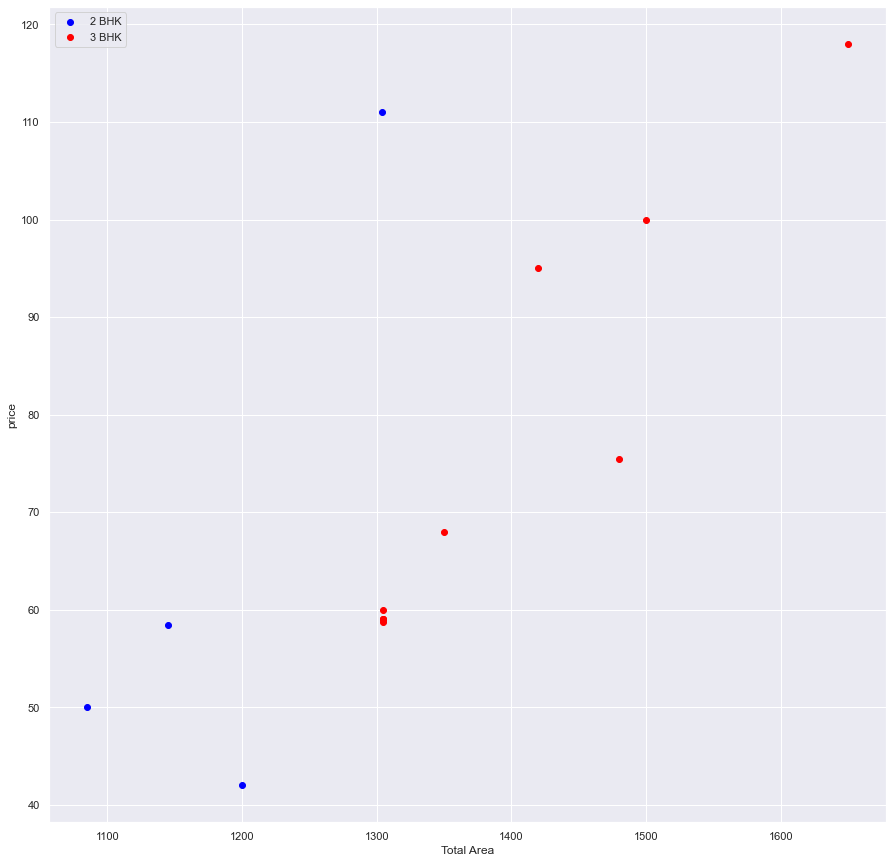

In [102]:
plt.figure(figsize = (15,15))
plt.scatter(x = rand_a.new_sqft , y = rand_a.price , color = 'blue' , label = '2 BHK')
plt.scatter(x = rand_b.new_sqft , y = rand_b.price , color = 'red' , label = '3 BHK')
plt.xlabel('Total Area')
plt.ylabel('price')
plt.legend()
plt.show()

In [103]:
rand_c = new_df1.groupby('location').get_group('Banashankari Stage III')
rand_c

,area_type,availability,location,size,total_sqft,bath,balcony,price,bedrooms,new_sqft,price_per_sqft
761,Super built-up Area,Under Construction,Banashankari Stage III,3 BHK,1305.0,2.0,1.0,58.70,3,1305.0,4498.084291
762,Super built-up Area,Under Construction,Banashankari Stage III,2 BHK,1145.0,2.0,3.0,58.40,2,1145.0,5100.436681
763,Super built-up Area,Under Construction,Banashankari Stage III,3 BHK,1650.0,3.0,2.0,118.00,3,1650.0,7151.515152
764,Plot Area,Ready To Move,Banashankari Stage III,4 Bedroom,2400.0,4.0,1.0,240.00,4,2400.0,10000.000000
765,Super built-up Area,Ready To Move,Banashankari Stage III,3 BHK,1350.0,2.0,2.0,68.00,3,1350.0,5037.037037
766,Built-up Area,Ready To Move,Banashankari Stage III,4 Bedroom,2000.0,4.0,0.0,100.00,4,2000.0,5000.000000
767,Super built-up Area,Ready To Move,Banashankari Stage III,3 BHK,1305.0,2.0,1.0,59.00,3,1305.0,4521.072797
768,Super built-up Area,Ready To Move,Banashankari Stage III,3 BHK,1305.0,2.0,1.0,60.00,3,1305.0,4597.701149
769,Super built-up Area,Ready To Move,Banashankari Stage III,2 BHK,1200.0,2.0,0.0,42.00,2,1200.0,3500.000000
770,Super built-up Area,Ready To Move,Banashankari Stage III,3 BHK,1305.0,2.0,1.0,59.00,3,1305.0,4521.072797


We can observe some instances that similar locality and for similar total area in Sqft price of 2BHK is mpre than 3 BHk ,
We might observe such cases in location and needs to be treated / removed 

In [104]:
bhk_stats = {}
for no_bhk , bhk_groups in rand_c.groupby('bedrooms'):
    bhk_stats[no_bhk] = { 'mean' : np.mean(bhk_groups.price_per_sqft) ,
                           'std dev' : np.std(bhk_groups.price_per_sqft),
                            'count' : bhk_groups.shape[0]}
    
bhk_stats    
    

{2: {'mean': 5430.250387687147, 'std dev': 1871.4365421808766, 'count': 4},
 3: {'mean': 5330.43635317069, 'std dev': 1014.1370099612311, 'count': 10},
 4: {'mean': 7333.333333333333, 'std dev': 2054.8046676563254, 'count': 3},
 6: {'mean': 5000.0, 'std dev': 0.0, 'count': 1}}

We can find mean of price_per_sqft for each type BHK groups for each location group ,

Then we can filter the unlikely price ambiguities 
For example in a particular location group 
* price_per_Sqft for 2BHk which are less than mean of 1BHK seems unlikely since price_per_sqft needs to be more for 2BHk 
similarly 
* price_per_sqft for 3BHK less than mean of 2BHK seems unlikely 

All these can be treated as outliers and removed 

In [105]:
outlier_index = np.array([])
#assigning an empty array to remove rows based on index 
for location , location_group in new_df1.groupby('location') : # Creating groups basis location
    bedroom_grp_stats = {}
    for no_bhk , bhk_groups in location_group.groupby('bedrooms') : # creating groups basis number of bedrooms
        bedroom_grp_stats[no_bhk] = { 'mean' : np.mean(bhk_groups.price_per_sqft) ,
                                      'std dev' : np.std(bhk_groups.price_per_sqft),
                                    'count' : bhk_groups.shape[0]}
    for no_bhk , bhk_groups in location_group.groupby('bedrooms') : # checking if price of n-1 bedrooms is more than n bedrooms
            lesser_bed_grp_stats = bedroom_grp_stats.get(no_bhk -1)
            if lesser_bed_grp_stats and lesser_bed_grp_stats['count'] > 5 :
                outlier_index = np.append(outlier_index , bhk_groups[bhk_groups.price_per_sqft < (lesser_bed_grp_stats['mean'])].index.values)
outlier_index             

array([1.1000e+01, 7.0000e+00, 2.3000e+01, ..., 9.0510e+03, 9.9330e+03,
       1.0518e+04])

In [106]:
new_df1.shape

(10551, 11)

In [107]:
len(outlier_index)

3200

In [108]:
new_df1 = new_df1.drop(outlier_index , axis = 'index')
new_df1.shape

(7351, 11)

In [109]:
new_df1.head(20)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bedrooms,new_sqft,price_per_sqft
0,Super built-up Area,Under Construction,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,2850.0,15017.543860
1,Super built-up Area,Under Construction,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,1630.0,11901.840491
2,Super built-up Area,Ready To Move,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,1875.0,12533.333333
3,Built-up Area,Under Construction,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,1200.0,10833.333333
4,Super built-up Area,Under Construction,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,1235.0,11983.805668
5,Super built-up Area,Under Construction,1st Block Jayanagar,4 BHK,2750.0,4.0,0.0,413.0,4,2750.0,15018.181818
6,Super built-up Area,Under Construction,1st Block Jayanagar,4 BHK,2450.0,4.0,2.0,368.0,4,2450.0,15020.408163
8,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,1875.0,3.0,1.0,167.0,3,1875.0,8906.666667
9,Built-up Area,Ready To Move,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,2.0,85.0,5,1500.0,5666.666667
10,Super built-up Area,Ready To Move,1st Phase JP Nagar,3 BHK,2065.0,4.0,1.0,210.0,3,2065.0,10169.491525


In [110]:
new_df1.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price', 'bedrooms', 'new_sqft', 'price_per_sqft'],
      dtype='object')

## Data Dictionary of new_df1 
* Area type : The Type of Area of Property
* Availability : Status of ready to posses the property 
* location : Location in Bangalore
* Size : No of Bedrooms as given in original data set 
* total_sqft : Sqft of house as in original data set 
* bath : No of bath rooms as in original data set 
* balcony : No of balcony as in original data set 
* price: price of house in original data set 

Feature engineering columns 

* bedrooms : No of bedrooms extracted from string format 
* new_sqf_ft : Float value from string format 
* Price per Sqft 

We can omit below variables 

* Size --> Since we have extracted No of bedrooms to another feature 'Bedrooms'
* total_sqft --> Since it was in string format and we have created an other treated column 'new_sqft'
* Price_per_sqft --> was a created feature based on price just to understand extremities in every location 

In [111]:
new_df2 = new_df1 .copy()

In [112]:
new_df2 = new_df2.drop(['size', 'total_sqft' , 'price_per_sqft'] , axis = 1)
new_df2.head()

,area_type,availability,location,bath,balcony,price,bedrooms,new_sqft
0,Super built-up Area,Under Construction,1st Block Jayanagar,4.0,1.0,428.0,4,2850.0
1,Super built-up Area,Under Construction,1st Block Jayanagar,3.0,2.0,194.0,3,1630.0
2,Super built-up Area,Ready To Move,1st Block Jayanagar,2.0,3.0,235.0,3,1875.0
3,Built-up Area,Under Construction,1st Block Jayanagar,2.0,0.0,130.0,3,1200.0
4,Super built-up Area,Under Construction,1st Block Jayanagar,2.0,2.0,148.0,2,1235.0


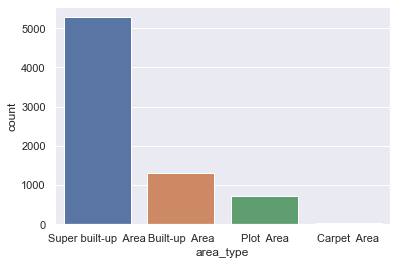

Super built-up  Area    5281
Built-up  Area          1301
Plot  Area               726
Carpet  Area              43
Name: area_type, dtype: int64


In [113]:
# Understanding area type and Price
sns.countplot(new_df2['area_type'])
plt.show()
print(new_df2['area_type'].value_counts())

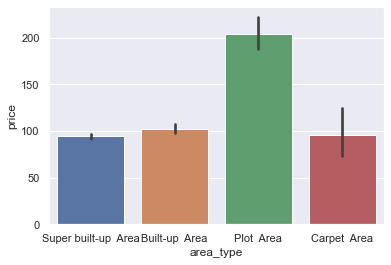

In [114]:
sns.barplot(x = new_df2['area_type'] , y = new_df2['price'])
plt.xlabel('area_type')
plt.ylabel('price')
plt.show()

We can obsereve that Area type has impact on price since plot area type is showing data points with more price and super_built_up area type has less price when compared to other

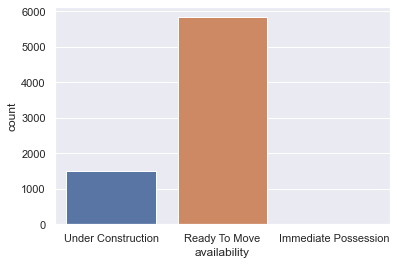

Ready To Move           5838
Under Construction      1512
Immediate Possession       1
Name: availability, dtype: int64


In [115]:
# Understanding availability and Price 
sns.countplot(new_df2['availability'])
plt.show()
print(new_df2['availability'].value_counts())

We can see that most of the proprties are ready to move in properties 

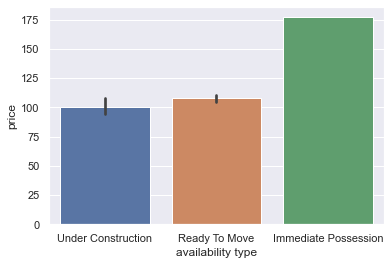

In [116]:
sns.barplot(x = new_df2['availability'] , y = new_df2['price'])
plt.xlabel('availability type')
plt.ylabel('price')
plt.show()

We can observe that availability type has impact on price ,

* Properties which are for immediate possession quote more 
* Properties which are under construction are quoting less price 


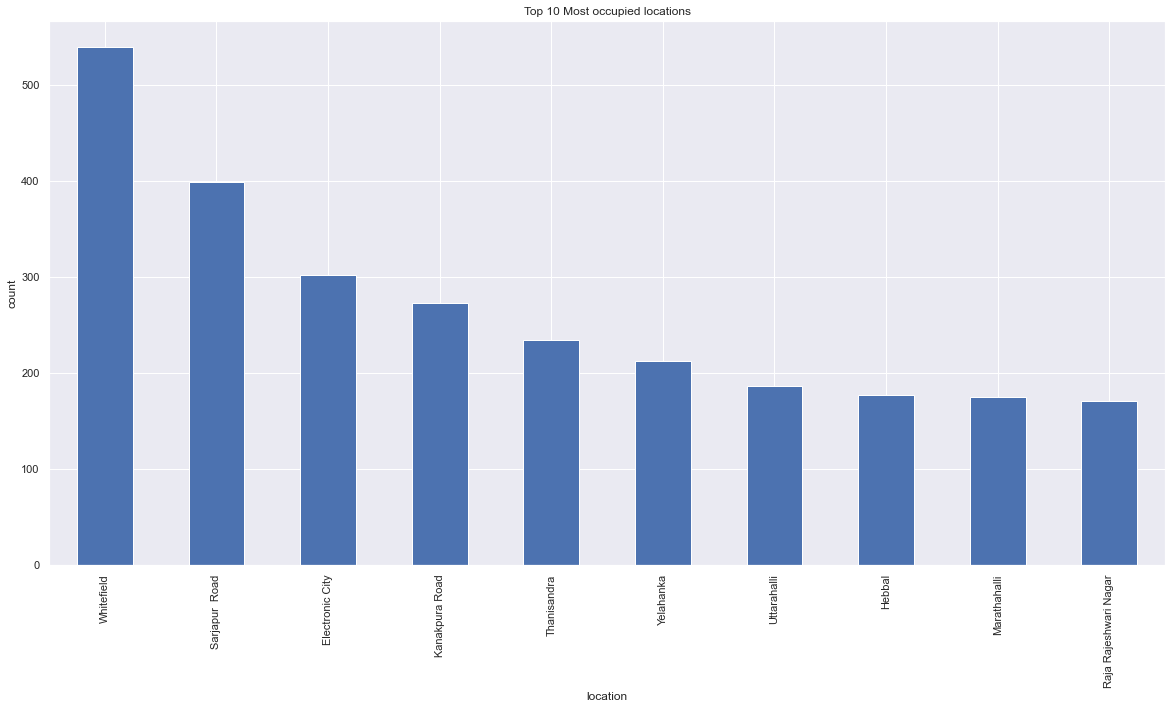

In [117]:
# Most Occupied locations
plt.figure(figsize = (20,10))
plot = data['location'].value_counts().nlargest(10).plot(kind = 'bar')
plt.xlabel('location')
plt.ylabel('count')
plt.title('Top 10 Most occupied locations')
plt.show()

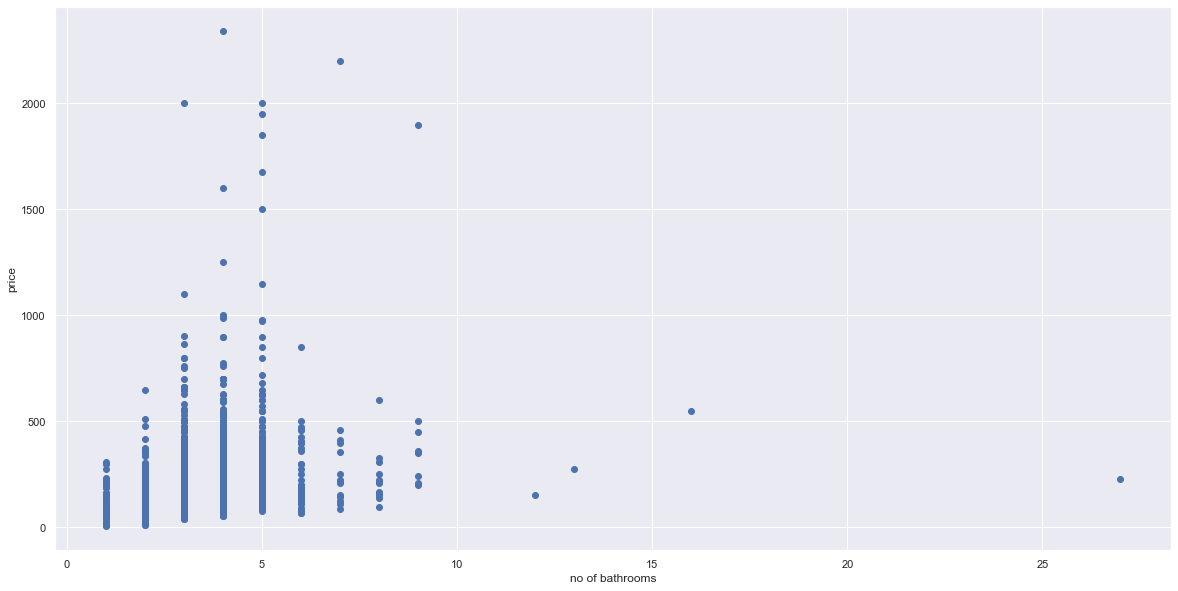

In [118]:
# Relation with Number of Bathrooms and Price
plt.figure(figsize = (20,10))
plt.scatter( x = 'bath' , y = 'price' , data = new_df2)
plt.xlabel('no of bathrooms')
plt.ylabel('price')
plt.show()

We can see that there is no strong relation with no of bathrooms and price as price for property with 5 bathrooms are more when compared to price for property with more than 10 bathrooms

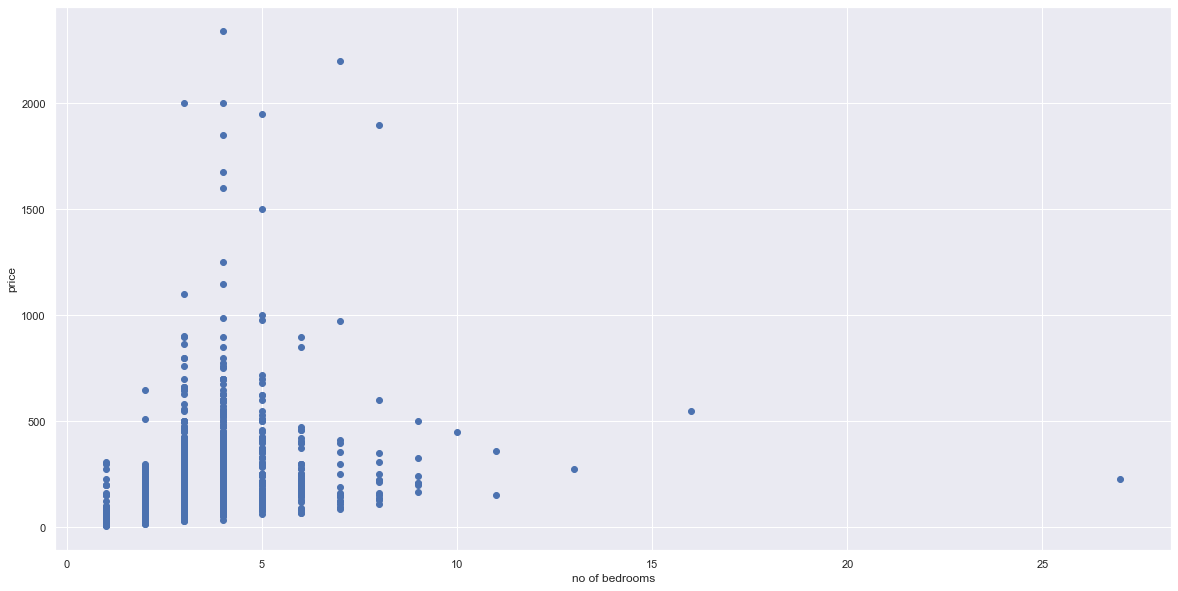

In [119]:
# Bedrooms Vs Price
plt.figure(figsize = (20,10))
plt.scatter( x = 'bedrooms' , y = 'price' , data = new_df2)
plt.xlabel('no of bedrooms')
plt.ylabel('price')
plt.show()

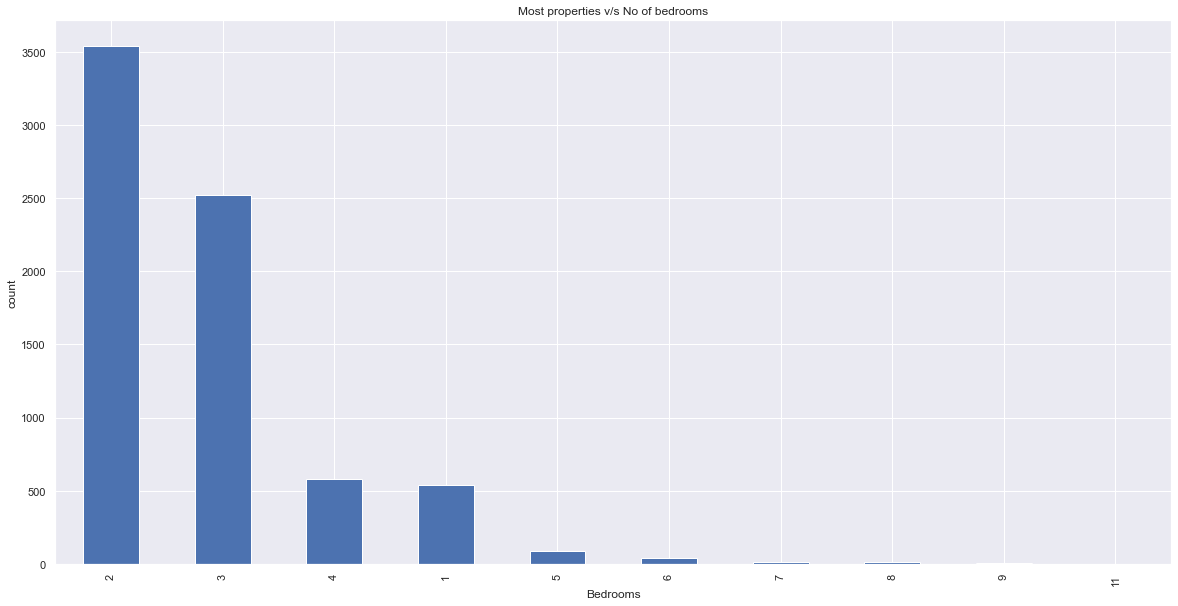

In [120]:
plt.figure(figsize = (20,10))
plot = new_df2['bedrooms'].value_counts().nlargest(10).plot(kind = 'bar')
plt.xlabel('Bedrooms')
plt.ylabel('count')
plt.title('Most properties v/s No of bedrooms')
plt.show()

We can observe that majority of the properties are 2BHK and 3BHK 

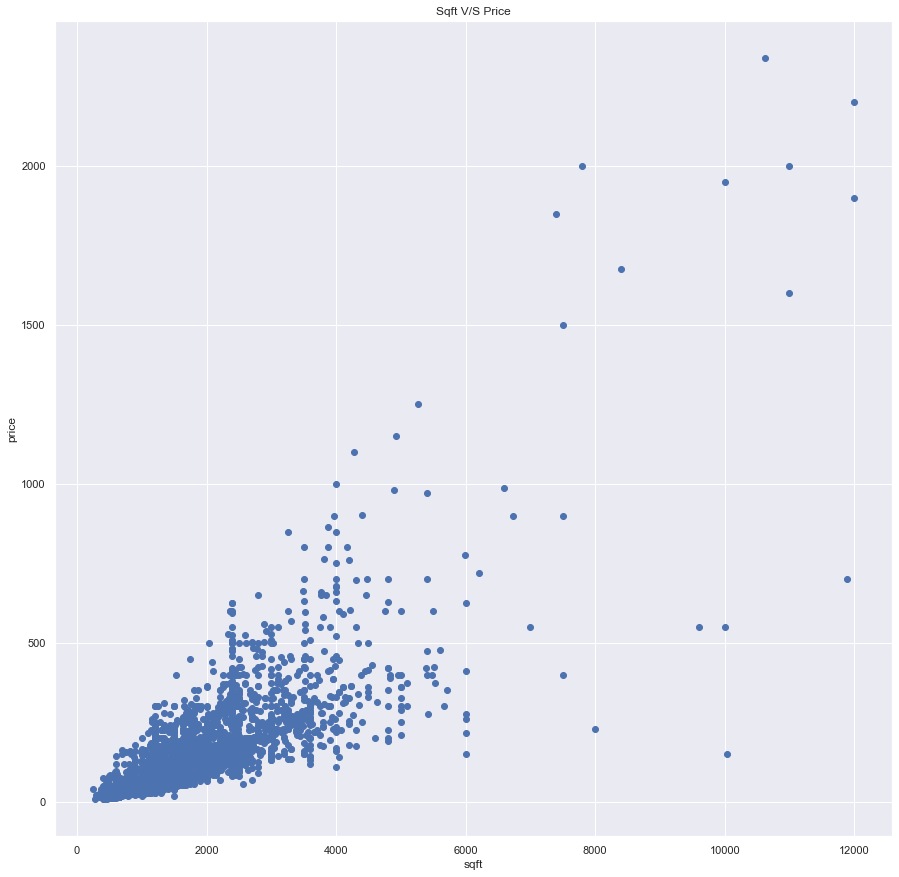

In [121]:
plt.figure(figsize = (15,15))
plt.scatter(x = 'new_sqft' , y = 'price' , data = new_df2)
plt.title('Sqft V/S Price')
plt.xlabel('sqft')
plt.ylabel('price')
plt.show()

We can observe a sort of linear relation ship with sqft are and price 

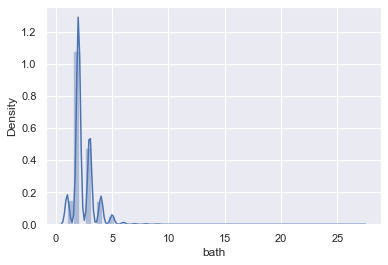

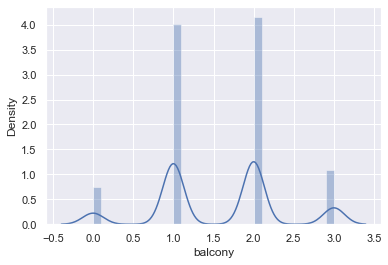

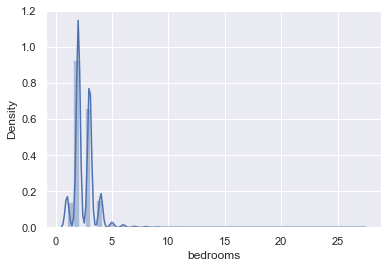

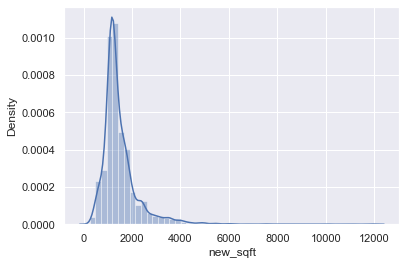

In [122]:
for i in ['bath' , 'balcony' , 'bedrooms' , 'new_sqft'] :
    sns.distplot(new_df2[i])
    plt.show()

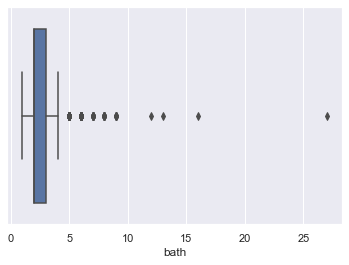

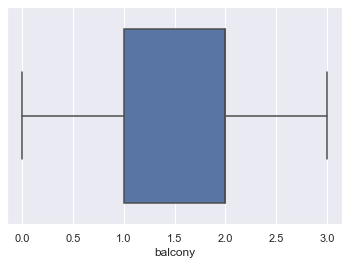

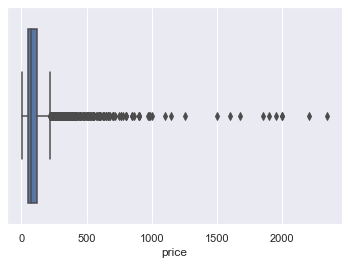

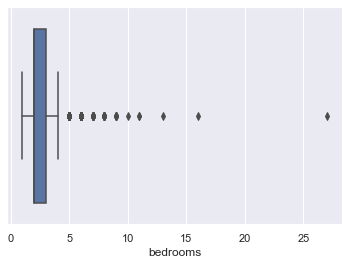

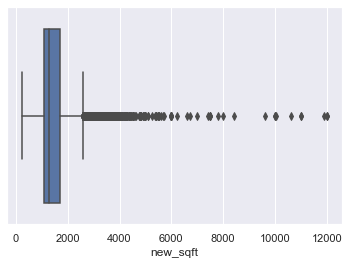

In [123]:
for i in new_df2.select_dtypes(exclude = 'object').columns  :
    sns.boxplot(new_df2[i])
    plt.show()

In [124]:
new_df2[new_df2['bath']>10]

,area_type,availability,location,bath,balcony,price,bedrooms,new_sqft
8364,Super built-up Area,Ready To Move,others,27.0,0.0,230.0,27,8000.0
8710,Super built-up Area,Ready To Move,others,16.0,2.0,550.0,16,10000.0
9530,Super built-up Area,Ready To Move,others,12.0,2.0,150.0,11,6000.0
9897,Super built-up Area,Ready To Move,others,13.0,0.0,275.0,13,5425.0


In [125]:
new_df2[new_df2['bedrooms'] > 10]

,area_type,availability,location,bath,balcony,price,bedrooms,new_sqft
8115,Super built-up Area,Ready To Move,others,9.0,3.0,360.0,11,5000.0
8364,Super built-up Area,Ready To Move,others,27.0,0.0,230.0,27,8000.0
8710,Super built-up Area,Ready To Move,others,16.0,2.0,550.0,16,10000.0
9530,Super built-up Area,Ready To Move,others,12.0,2.0,150.0,11,6000.0
9897,Super built-up Area,Ready To Move,others,13.0,0.0,275.0,13,5425.0


In [126]:
new_df2[new_df2['new_sqft'] > 10000]

,area_type,availability,location,bath,balcony,price,bedrooms,new_sqft
4961,Super built-up Area,Under Construction,Malleshwaram,7.0,3.0,2200.0,7,12000.0
7248,Plot Area,Ready To Move,Whitefield,4.0,3.0,700.0,4,11890.0
8968,Plot Area,Under Construction,others,9.0,2.0,1900.0,8,12000.0
9414,Plot Area,Under Construction,others,5.0,3.0,2000.0,4,11000.0
9559,Super built-up Area,Under Construction,others,4.0,1.0,1600.0,4,11000.0
9930,Plot Area,Ready To Move,others,1.0,1.0,150.0,1,10030.0
9981,Plot Area,Ready To Move,others,4.0,2.0,2340.0,4,10624.0


Further more we can see presence of outliers , 
Trying with an approach to cap the outliers using IQR range 

In [ ]:
# new_df3 = new_df2.copy()
# new_df3.head()

In [ ]:
# p1 = new_df3['new_sqft'].quantile(0.25)
# p3 = new_df3['new_sqft'].quantile(0.75)
# interquart = p3 - p1
# ul = p3 + 1.5 * interquart
# ll = p3 - 1.5 * interquart

# print(p1 ,
#       p3 ,
#       interquart , 
#       ul , 
#       ll)

In [ ]:
# new_df3[new_df3['new_sqft'] > ul ]

There are more data points with sqft more than upper range , hence capping method might result in inaccurate data 

In [127]:
# considering the dataframe for label encoding

new_df2

,area_type,availability,location,bath,balcony,price,bedrooms,new_sqft
0,Super built-up Area,Under Construction,1st Block Jayanagar,4.0,1.0,428.0,4,2850.0
1,Super built-up Area,Under Construction,1st Block Jayanagar,3.0,2.0,194.0,3,1630.0
2,Super built-up Area,Ready To Move,1st Block Jayanagar,2.0,3.0,235.0,3,1875.0
3,Built-up Area,Under Construction,1st Block Jayanagar,2.0,0.0,130.0,3,1200.0
4,Super built-up Area,Under Construction,1st Block Jayanagar,2.0,2.0,148.0,2,1235.0
...,...,...,...,...,...,...,...,...
10542,Plot Area,Ready To Move,others,2.0,2.0,360.0,3,2000.0
10543,Built-up Area,Ready To Move,others,1.0,1.0,185.0,2,1140.0
10546,Super built-up Area,Ready To Move,others,2.0,2.0,110.0,2,1353.0
10547,Plot Area,Under Construction,others,1.0,0.0,26.0,1,812.0


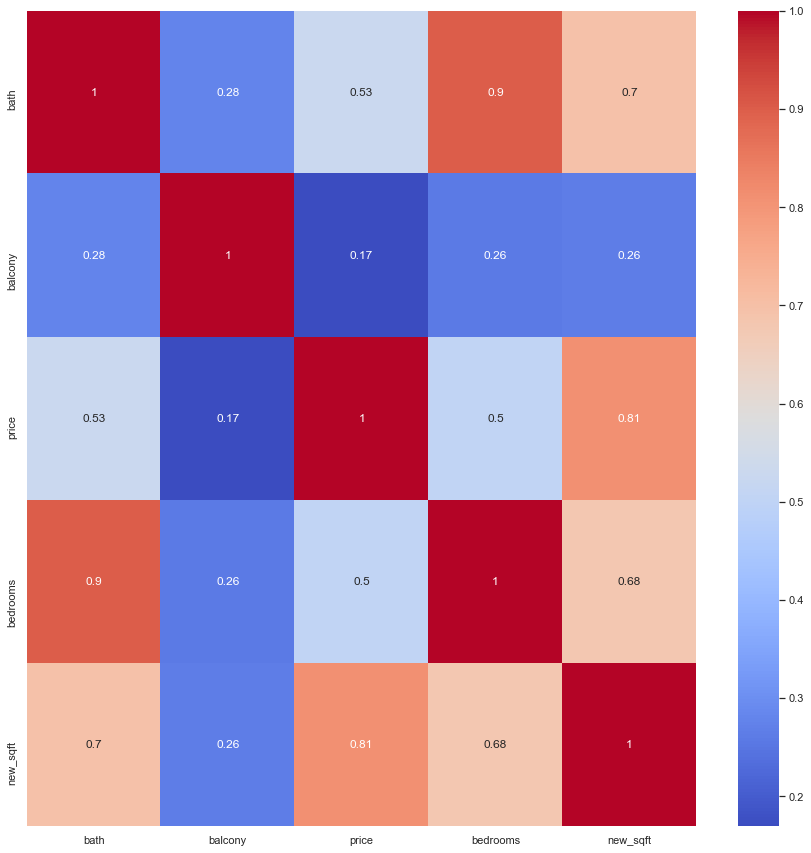

In [128]:
plt.figure(figsize =(15,15))
corr = new_df2.corr()
sns.heatmap(corr , annot = True , cmap = 'coolwarm')
plt.show()

* We can see strong positive corelation between new_Sqft and Price of 0.81
* Whereas we can see balcony has no corelation with price since it holds a correlation value of 0.17
  We can remove balcony before model building 

* Bath and bedroom have strong corelation amongst them , this might cause multicollinearity
  One of them can be removed , but we shall cross verify this with Variance inflation factor 

In [129]:
new_df3 = new_df2.copy()

In [131]:
new_df3 = new_df3.drop(['balcony'],axis = 1)
new_df3.head(5)

,area_type,availability,location,bath,price,bedrooms,new_sqft
0,Super built-up Area,Under Construction,1st Block Jayanagar,4.0,428.0,4,2850.0
1,Super built-up Area,Under Construction,1st Block Jayanagar,3.0,194.0,3,1630.0
2,Super built-up Area,Ready To Move,1st Block Jayanagar,2.0,235.0,3,1875.0
3,Built-up Area,Under Construction,1st Block Jayanagar,2.0,130.0,3,1200.0
4,Super built-up Area,Under Construction,1st Block Jayanagar,2.0,148.0,2,1235.0


# Label Encoding 

In [132]:
new_df3 = pd.get_dummies(new_df3 , columns = ['location' , 'availability' , 'area_type'])
new_df3.shape

(7351, 253)

In [133]:
new_df3.columns

Index(['bath', 'price', 'bedrooms', 'new_sqft', 'location_1st Block Jayanagar',
       'location_1st Phase JP Nagar', 'location_2nd Phase Judicial Layout',
       'location_2nd Stage Nagarbhavi', 'location_5th Block Hbr Layout',
       'location_5th Phase JP Nagar',
       ...
       'location_Yelenahalli', 'location_Yeshwanthpur', 'location_others',
       'availability_Immediate Possession', 'availability_Ready To Move',
       'availability_Under Construction', 'area_type_Built-up  Area',
       'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area'],
      dtype='object', length=253)

In [134]:
new_df3 = new_df3.drop(['area_type_Super built-up  Area', 'availability_Under Construction' ,'location_others' ] , axis = 1)
new_df3.shape

(7351, 250)

In [135]:
# Split data into x and y 

x = new_df3.drop(['price'] , axis = 1)
y = new_df3['price']
print(x.shape , y.shape)

(7351, 249) (7351,)


In [136]:
x.head()

,bath,bedrooms,new_sqft,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,...,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,availability_Immediate Possession,availability_Ready To Move,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area
0,4.0,4,2850.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3,1630.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3,1875.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2.0,3,1200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,2,1235.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

# Feature scaling 

In [138]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2,3,4,5,6,7,8,9,...,239,240,241,242,243,244,245,246,247,248
0,1.516897,1.489254,1.654916,32.390475,-0.046705,-0.033007,-0.026089,-0.028581,-0.061835,-0.043682,...,-0.038712,-0.110074,-0.060717,-0.033007,-0.072085,-0.011664,-1.964322,-0.463725,-0.076707,-0.331036
1,0.537304,0.479895,0.166265,32.390475,-0.046705,-0.033007,-0.026089,-0.028581,-0.061835,-0.043682,...,-0.038712,-0.110074,-0.060717,-0.033007,-0.072085,-0.011664,-1.964322,-0.463725,-0.076707,-0.331036
2,-0.442289,0.479895,0.465215,32.390475,-0.046705,-0.033007,-0.026089,-0.028581,-0.061835,-0.043682,...,-0.038712,-0.110074,-0.060717,-0.033007,-0.072085,-0.011664,0.509082,-0.463725,-0.076707,-0.331036
3,-0.442289,0.479895,-0.358423,32.390475,-0.046705,-0.033007,-0.026089,-0.028581,-0.061835,-0.043682,...,-0.038712,-0.110074,-0.060717,-0.033007,-0.072085,-0.011664,-1.964322,2.156448,-0.076707,-0.331036
4,-0.442289,-0.529464,-0.315716,32.390475,-0.046705,-0.033007,-0.026089,-0.028581,-0.061835,-0.043682,...,-0.038712,-0.110074,-0.060717,-0.033007,-0.072085,-0.011664,-1.964322,-0.463725,-0.076707,-0.331036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7346,-0.442289,0.479895,0.617741,-0.030873,-0.046705,-0.033007,-0.026089,-0.028581,-0.061835,-0.043682,...,-0.038712,-0.110074,-0.060717,-0.033007,-0.072085,-0.011664,0.509082,-0.463725,-0.076707,3.020818
7347,-1.421883,-0.529464,-0.431636,-0.030873,-0.046705,-0.033007,-0.026089,-0.028581,-0.061835,-0.043682,...,-0.038712,-0.110074,-0.060717,-0.033007,-0.072085,-0.011664,0.509082,2.156448,-0.076707,-0.331036
7348,-0.442289,-0.529464,-0.171732,-0.030873,-0.046705,-0.033007,-0.026089,-0.028581,-0.061835,-0.043682,...,-0.038712,-0.110074,-0.060717,-0.033007,-0.072085,-0.011664,0.509082,-0.463725,-0.076707,-0.331036
7349,-1.421883,-1.538822,-0.831863,-0.030873,-0.046705,-0.033007,-0.026089,-0.028581,-0.061835,-0.043682,...,-0.038712,-0.110074,-0.060717,-0.033007,-0.072085,-0.011664,-1.964322,-0.463725,-0.076707,3.020818


In [139]:
# Checking Multicollinearity through variance inflation factor 

from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = sc_x
vif = pd.DataFrame()
vif['variance_inflation_factor'] = [variance_inflation_factor(variable , i) for i in range (variable.shape[1])]
vif['features'] = x.columns

In [141]:
pd.set_option('display.max_rows' , 250)
vif

,variance_inflation_factor,features
0,6.296924,bath
1,6.147168,bedrooms
2,2.186852,new_sqft
3,1.011641,location_1st Block Jayanagar
4,1.015490,location_1st Phase JP Nagar
5,1.010088,location_2nd Phase Judicial Layout
6,1.012202,location_2nd Stage Nagarbhavi
7,1.006726,location_5th Block Hbr Layout
8,1.028753,location_5th Phase JP Nagar
9,1.014374,location_6th Phase JP Nagar


From the VIF dataframe , we can see that the feature bath and bedroom posses high VIF Value meaning there is multicollinearity in data set and bath and bedrooms are highly correlated since VIF is more than 5 


Since VIF of bath is higher with 6.29 , we can drop the bath variable 


In [142]:
x1 = x.copy()
x1.head()

,bath,bedrooms,new_sqft,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,...,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,availability_Immediate Possession,availability_Ready To Move,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area
0,4.0,4,2850.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3,1630.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3,1875.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2.0,3,1200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,2,1235.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
x1 = x1.drop(['bath'] , axis = 1)
x1.head()

,bedrooms,new_sqft,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,...,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,availability_Immediate Possession,availability_Ready To Move,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area
0,4,2850.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,1200.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2,1235.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
sc_x1 = sc.fit_transform(x1)
pd.DataFrame(sc_x1)

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
0,1.489254,1.654916,32.390475,-0.046705,-0.033007,-0.026089,-0.028581,-0.061835,-0.043682,-0.108801,...,-0.038712,-0.110074,-0.060717,-0.033007,-0.072085,-0.011664,-1.964322,-0.463725,-0.076707,-0.331036
1,0.479895,0.166265,32.390475,-0.046705,-0.033007,-0.026089,-0.028581,-0.061835,-0.043682,-0.108801,...,-0.038712,-0.110074,-0.060717,-0.033007,-0.072085,-0.011664,-1.964322,-0.463725,-0.076707,-0.331036
2,0.479895,0.465215,32.390475,-0.046705,-0.033007,-0.026089,-0.028581,-0.061835,-0.043682,-0.108801,...,-0.038712,-0.110074,-0.060717,-0.033007,-0.072085,-0.011664,0.509082,-0.463725,-0.076707,-0.331036
3,0.479895,-0.358423,32.390475,-0.046705,-0.033007,-0.026089,-0.028581,-0.061835,-0.043682,-0.108801,...,-0.038712,-0.110074,-0.060717,-0.033007,-0.072085,-0.011664,-1.964322,2.156448,-0.076707,-0.331036
4,-0.529464,-0.315716,32.390475,-0.046705,-0.033007,-0.026089,-0.028581,-0.061835,-0.043682,-0.108801,...,-0.038712,-0.110074,-0.060717,-0.033007,-0.072085,-0.011664,-1.964322,-0.463725,-0.076707,-0.331036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7346,0.479895,0.617741,-0.030873,-0.046705,-0.033007,-0.026089,-0.028581,-0.061835,-0.043682,-0.108801,...,-0.038712,-0.110074,-0.060717,-0.033007,-0.072085,-0.011664,0.509082,-0.463725,-0.076707,3.020818
7347,-0.529464,-0.431636,-0.030873,-0.046705,-0.033007,-0.026089,-0.028581,-0.061835,-0.043682,-0.108801,...,-0.038712,-0.110074,-0.060717,-0.033007,-0.072085,-0.011664,0.509082,2.156448,-0.076707,-0.331036
7348,-0.529464,-0.171732,-0.030873,-0.046705,-0.033007,-0.026089,-0.028581,-0.061835,-0.043682,-0.108801,...,-0.038712,-0.110074,-0.060717,-0.033007,-0.072085,-0.011664,0.509082,-0.463725,-0.076707,-0.331036
7349,-1.538822,-0.831863,-0.030873,-0.046705,-0.033007,-0.026089,-0.028581,-0.061835,-0.043682,-0.108801,...,-0.038712,-0.110074,-0.060717,-0.033007,-0.072085,-0.011664,-1.964322,-0.463725,-0.076707,3.020818


# Train and Test Split

In [145]:
# Passing scaled data 
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(sc_x1 , y , test_size = 0.25 , random_state = 101)
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(5513, 248) (1838, 248) (5513,) (1838,)


In [146]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

In [147]:
print('coeff :' , lr.coef_)
print('--------------------------------')
print('intercept :' , lr.intercept_)

coeff : [-1.21064732e+01  9.31805855e+01  1.81951331e+00 -1.32205260e+00
 -2.67314443e+00  1.63933140e+00 -4.11260705e+00 -4.34970193e+00
 -1.95969169e+00 -4.67201699e+00 -5.37851089e+00 -4.96042987e+00
 -1.94811580e+00 -3.08814601e+00 -5.22161739e+00 -2.57067555e+00
 -4.37036712e+00 -2.61158749e+00 -4.19629180e+00 -3.77059584e+00
 -2.85815836e+00 -3.21388035e+00 -4.08016412e+00 -2.38620405e+00
 -3.63143001e+00 -3.05999556e+00 -9.31684548e-01 -3.09012198e+00
 -3.54973362e+00 -2.26473060e+00 -2.68419792e+00 -5.08319536e+00
  1.85582622e+00 -3.16768611e+00 -3.28436686e+00 -6.13204549e+00
 -2.46283888e+00 -2.39254615e+00 -1.53956390e+00 -6.91404584e+00
  4.92244507e-01 -1.20337208e+00 -4.22115617e+00 -3.29386090e+00
 -6.93605427e+00 -6.13906707e+00  2.02388655e+00 -2.50354098e+00
 -3.55509980e+00 -2.02912751e+00 -1.68298361e+00 -3.20110094e+00
 -2.99708395e+00 -4.65958360e+00 -3.48688324e+00 -1.70649287e+00
 -3.16925529e+00 -4.85798637e+00 -3.85535980e+00 -4.63495916e-01
 -6.36276768e+00 

In [148]:
# Model Prediction 
y_pred_test = lr.predict(x_test)
y_pred_train = lr.predict(x_train)

In [149]:
# Model evaluation 
from sklearn.metrics import r2_score

In [150]:
training_accuracy = r2_score(y_train , y_pred_train)
testing_accuracy = r2_score(y_test , y_pred_test)

In [151]:
print('train accuracy :' , training_accuracy)
print('test accuracy :' , testing_accuracy)

train accuracy : 0.7752823991493352
test accuracy : -8.564214657235308


In [272]:
MAE_LRU = metrics.mean_absolute_error(y_test , y_pred_test)
MAPE_LRU = (metrics.mean_absolute_error(y_test , y_pred_test))/100
MSE_LRU = metrics.mean_squared_error(y_test , y_pred_test)
RMSE_LRU = np.sqrt(metrics.mean_squared_error(y_test , y_pred_test))
print("MAE_LRU :" , MAE_LRU)
print("MAPE_LRU :" , MAPE_LRU)
print("MSE_LRU :" , MSE_LRU)
print("RMSE_LRU :" , RMSE_LRU)

MAE_LRU : 35.468134209491495
MAPE_LRU : 0.354681342094915
MSE_LRU : 146208.45279388246
RMSE_LRU : 382.3721391444236


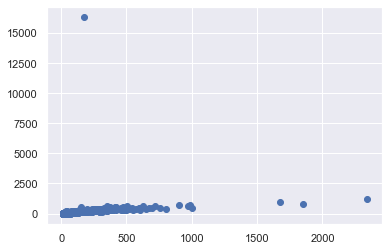

In [152]:
plt.scatter(y_test , y_pred_test)
plt.show()

In [153]:
# Passing unscaled data 
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x1 , y , test_size = 0.25 , random_state = 101)
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(5513, 248) (1838, 248) (5513,) (1838,)


In [154]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(x_train , y_train)

LinearRegression()

In [155]:
# Model Prediction 
y_pred_test1 = lr.predict(x_test)
y_pred_train1 = lr.predict(x_train)

In [156]:
training_accuracy1 = r2_score(y_train , y_pred_train1)
testing_accuracy1 = r2_score(y_test , y_pred_test1)

In [157]:
print('train accuracy_unscaled data :' , training_accuracy)
print('test accuracy_unscaled data :' , testing_accuracy)

train accuracy_unscaled data : 0.7752823991493352
test accuracy_unscaled data : -8.564214657235308


In [273]:
MAE_LRS = metrics.mean_absolute_error(y_test , y_pred_test1)
MAPE_LRS = (metrics.mean_absolute_error(y_test , y_pred_test1))/100
MSE_LRS = metrics.mean_squared_error(y_test , y_pred_test1)
RMSE_LRS = np.sqrt(metrics.mean_squared_error(y_test , y_pred_test1))
print("MAE_LRS :" , MAE_LRS)
print("MAPE_LRS :" , MAPE_LRS)
print("MSE_LRS :" , MSE_LRS)
print("RMSE_LRS :" , RMSE_LRS)

MAE_LRS : 137148.18218862975
MAPE_LRS : 1371.4818218862974
MSE_LRS : 24053305278.819267
RMSE_LRS : 155091.280473208


# OLS Approach 

In [158]:
from statsmodels.regression.linear_model import OLS 
import statsmodels.regression.linear_model as smf

In [159]:
reg_model = smf.OLS( endog = y_train , exog = x_train).fit()

In [160]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.876
Model:                            OLS   Adj. R-squared (uncentered):              0.871
Method:                 Least Squares   F-statistic:                              151.1
Date:                Sun, 18 Feb 2024   Prob (F-statistic):                        0.00
Time:                        11:53:26   Log-Likelihood:                         -29997.
No. Observations:                5513   AIC:                                  6.049e+04
Df Residuals:                    5266   BIC:                                  6.212e+04
Df Model:                         247                                                  
Covariance Type:            nonrobust                                                  
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
bedrooms                               -10.1578      1.013    -10.028      0.000     -12.144      -8.172
new_sqft                                 0.1145      0.001     85.986      0.000       0.112       0.117
location_1st Block Jayanagar            68.5312     23.399      2.929      0.003      22.659     114.403
location_1st Phase JP Nagar            -20.7642     14.824     -1.401      0.161     -49.826       8.298
location_2nd Phase Judicial Layout     -73.5478     23.387     -3.145      0.002    -119.397     -27.699
location_2nd Stage Nagarbhavi           63.1301     25.754      2.451      0.014      12.641     113.619
location_5th Block Hbr Layout         -141.2696     28.661     -4.929      0.000    -197.458     -85.081
location_5th Phase JP Nagar            -63.7451     12.306     -5.180      0.000     -87.869     -39.621
location_6th Phase JP Nagar            -38.8194     23.394     -1.659      0.097     -84.680       7.042
location_7th Phase JP Nagar            -36.4942      7.191     -5.075      0.000     -50.593     -22.396
location_8th Phase JP Nagar            -66.3889     11.507     -5.770      0.000     -88.947     -43.831
location_9th Phase JP Nagar            -72.6125     12.847     -5.652      0.000     -97.797     -47.428
location_AECS Layout                   -55.0254     25.606     -2.149      0.032    -105.224      -4.827
location_Abbigere                      -54.6400     17.310     -3.156      0.002     -88.576     -20.704
location_Akshaya Nagar                 -61.2775     10.100     -6.067      0.000     -81.078     -41.477
location_Ambalipura                    -47.6505     17.313     -2.752      0.006     -81.590     -13.711
location_Ambedkar Nagar                -68.0842     12.915     -5.272      0.000     -93.402     -42.766
location_Amruthahalli                  -47.2179     16.596     -2.845      0.004     -79.753     -14.683
location_Anandapura                    -79.5969     17.286     -4.605      0.000    -113.484     -45.710
location_Ananth Nagar                  -54.7766     13.527     -4.050      0.000     -81.294     -28.259
location_Anekal                        -44.8169     14.353     -3.123      0.002     -72.954     -16.679
location_Anjanapura                    -71.5897     18.129     -3.949      0.000    -107.129     -36.050
location_Ardendale                     -77.7592     16.605     -4.683      0.000    -110.312     -45.206
location_Arekere                       -57.2776     20.261     -2.827      0.005     -96.998     -17.558
location_Attibele                      -48.6030     11.546     -4.209      0.000     -71.238     -25.968
location_BEML Layout                   -80.7

Here Durbin watson is giving 2.039 ~ 2 --> so no auto correlation

In [161]:
y_pred_train_ols = reg_model.predict(x_train)
y_pred_test_ols = reg_model.predict(x_test)

In [162]:
print('training score :' , r2_score(y_train , y_pred_train_ols))
print()
print('testing score : ' , r2_score(y_test , y_pred_test_ols))

training score : 0.7741954048584044

testing score :  0.7596547512561002


In [163]:
training_score_ols = r2_score(y_train , y_pred_train_ols)
testing_score_ols = r2_score(y_test , y_pred_test_ols)
print(training_score_ols)
print(testing_score_ols)

0.7741954048584044
0.7596547512561002


In [181]:
from sklearn import metrics

In [182]:
MAE_OLS = metrics.mean_absolute_error(y_test , y_pred_test_ols)
MAPE_OLS = (metrics.mean_absolute_error(y_test , y_pred_test_ols))/100
MSE_OLS = metrics.mean_squared_error(y_test , y_pred_test_ols)
RMSE_OLS = np.sqrt(metrics.mean_squared_error(y_test , y_pred_test_ols))
print("MAE_OLS :" , MAE_OLS)
print("MAPE_OLS :" , MAPE_OLS)
print("MSE_OLS :" , MSE_OLS)
print("RMSE_OLS :" , RMSE_OLS)

MAE_OLS : 26.91617869806688
MAPE_OLS : 0.2691617869806688
MSE_OLS : 3674.165440088977
RMSE_OLS : 60.61489453994766


In [164]:
# Passing scaled data to OLS 
x_train , x_test , y_train , y_test = train_test_split(sc_x1 , y , test_size = 0.25 , random_state = 101)
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)


(5513, 248) (1838, 248) (5513,) (1838,)


In [165]:
reg_model_1 = smf.OLS( endog = y_train , exog = x_train).fit()

In [166]:
reg_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     73.54
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:08:33   Log-Likelihood:                -29984.
No. Observations:                5513   AIC:                         6.046e+04
Df Residuals:                    5265   BIC:                         6.210e+04
Df Model:                         247                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -12.1065      1.080    -11.210      0.000     -14.224      -9.989
x2            93.1806      1.095     85.079      0.000      91.033      95.328
x3             1.8195      0.722      2.519      0.012       0.403       3.236
x4            -1.3221      0.693     -1.908      0.056      -2.680       0.036
x5            -2.6731      0.771     -3.468      0.001      -4.184      -1.162
x6             1.6393      0.670      2.447      0.014       0.326       2.953
x7            -4.1126      0.817     -5.035      0.000      -5.714      -2.511
x8            -4.3497      0.761     -5.717      0.000      -5.841      -2.858
x9            -1.9597      1.019     -1.923      0.055      -3.957       0.038
x10           -4.6720      0.786     -5.947      0.000      -6.212      -3.132
x11           -5.3785      0.824     -6.531      0.000      -6.993      -3.764
x12           -4.9604      0.783     -6.331      0.000      -6.496      -3.425
x13           -1.9481      0.790     -2.467      0.014      -3.496      -0.400
x14           -3.0881      0.857     -3.603      0.000      -4.768      -1.408
x15           -5.2216      0.783     -6.665      0.000      -6.757      -3.686
x16           -2.5707      0.808     -3.182      0.001      -4.155      -0.987
x17           -4.3704      0.768     -5.693      0.000      -5.875      -2.865
x18           -2.6116      0.798     -3.272      0.001      -4.176      -1.047
x19           -4.1963      0.832     -5.046      0.000      -5.827      -2.566
x20           -3.7706      0.794     -4.748      0.000      -5.327      -2.214
x21           -2.8582      0.770     -3.713      0.000      -4.367      -1.349
x22           -3.2139      0.733     -4.385      0.000      -4.651      -1.777
x23           -4.0802      0.820     -4.975      0.000      -5.688      -2.472
x24           -2.3862      0.747     -3.194      0.001      -3.851      -0.922
x25           -3.6314      0.742     -4.894      0.000      -5.086      -2.177
x26           -3.0600      0.818     -3.743      0.000      -4.663      -1.457
x27           -0.9317      0.787     -1.184      0.236      -2.474       0.611
x28           -3.0901      0.982     -3.146      0.002      -5.015      -1.165
x29           -3.5497      0.782     -4.540      0.000      -5.083      -2.017
x30           -2.2647      0.759     -2.983      0.003      -3.753      -0.776
x31           -2.6842      0.749     -3.585      0.000      -4.152      -1.216
x32           -5.0832      0.795     -6.392      0.000      -6.642      -3.524
x33            1.8558      0.748      2.482      0.013       0.390       3.321
x34           -3.1677      0.919     -3.448      0.001      -4.969      -1.366
x35           -3.2844      0.904     -3.633      0.000      -5.056      -1.512
x36           -6.1320      0.798     -7.683      0.000      -7.697      -4.567
x3

In [167]:
y_pred_train_ols_scaled = reg_model.predict(x_train)
y_pred_test_ols_scaled = reg_model.predict(x_test)

In [168]:
training_score_ols_scaled = r2_score(y_train , y_pred_train_ols_scaled)
testing_score_ols_scaled = r2_score(y_test , y_pred_test_ols_scaled)
print('training score : ' , training_score_ols_scaled)
print('testing score :' ,testing_score_ols_scaled)

training score :  -45.49810227936663
testing score : -34.205976060930276


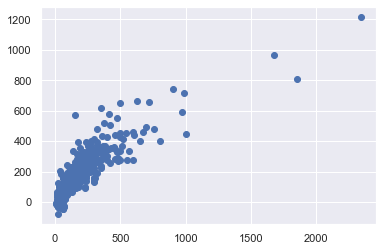

In [169]:
# Check Linearity 

plt.scatter(y_test , y_pred_test_ols)

# REGULARIZATION 

In [170]:
x_train , x_test , y_train , y_test = train_test_split(x1 , y , test_size = 0.25 , random_state = 101)
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(5513, 248) (1838, 248) (5513,) (1838,)


In [171]:
# Lasso Regularization 
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1)
lasso.fit(x_train , y_train)
print('Lasso Model' , (lasso.coef_))

Lasso Model [-1.11945762e+01  1.16741317e-01  2.04042779e+01  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.19795121e-01 -1.95392896e+00
 -0.00000000e+00 -0.00000000e+00 -1.59972657e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  3.63040062e+01 -0.00000000e+00 -0.00000000e+00 -4.90471207e+01
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  2.52231615e+01  0.00000000e+00 -2.38338867e+00 -0.00000000e+00
 -1.71020234e+01 -1.60800258e+00  3.31542697e+01 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -2.59087194e

In [172]:
y_pred_train_lasso = lasso.predict(x_train)
y_pred_test_lasso = lasso.predict(x_test)

In [173]:
training_score_lasso = r2_score(y_train , y_pred_train_lasso)
testing_score_lasso = r2_score(y_test , y_pred_test_lasso)
print("Training Accuracy :" ,r2_score(y_train , y_pred_train_lasso))
print('---------------------------------')
print("Testing Accuracy :", r2_score(y_test , y_pred_test_lasso))

Training Accuracy : 0.7288152585577146
---------------------------------
Testing Accuracy : 0.7258223126682208


In [186]:
MAE_lasso = metrics.mean_absolute_error(y_test , y_pred_test_lasso)
MAPE_lasso = (metrics.mean_absolute_error(y_test , y_pred_test_lasso))/100
MSE_lasso = metrics.mean_squared_error(y_test , y_pred_test_lasso)
RMSE_lasso = np.sqrt(metrics.mean_squared_error(y_test , y_pred_test_lasso))
print("MAE_lasso :" , MAE_lasso)
print("MAPE_lasso :" , MAPE_lasso)
print("MSE_lasso :" , MSE_lasso)
print("RMSE_lasso :" , RMSE_lasso)

MAE_lasso : 29.102268806571615
MAPE_lasso : 0.29102268806571613
MSE_lasso : 4191.363001776469
RMSE_lasso : 64.74073680285443


In [174]:
#Ridge Regularization 

from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.3)
ridge.fit(x_train , y_train)
print('Ridge Model :' , ridge.coef_)

Ridge Model : [-1.21814583e+01  1.14058319e-01  6.10898727e+01 -2.28960328e+01
 -7.21563589e+01  6.19088358e+01 -1.29793408e+02 -6.46036307e+01
 -3.79944467e+01 -3.81277445e+01 -6.99422142e+01 -7.56784968e+01
 -5.45188379e+01 -5.56051446e+01 -6.20708178e+01 -4.85861010e+01
 -6.77431480e+01 -4.81225226e+01 -8.08741351e+01 -5.83788217e+01
 -4.75774652e+01 -7.25079645e+01 -7.58669503e+01 -5.74599010e+01
 -5.13938196e+01 -7.83957061e+01 -1.20220665e+01 -6.53608989e+01
 -7.14727265e+01 -5.69746087e+01 -3.76154242e+01 -5.44214359e+01
  4.42313897e+01 -5.90764208e+01 -7.58601144e+01 -1.55940980e+02
 -5.44605301e+01 -9.07242269e+01 -4.27405696e+01 -5.18470223e+01
  1.37974425e+01 -2.90411621e+01 -8.12550643e+01 -7.43149383e+01
 -7.69319128e+01 -5.64173047e+01  6.01195562e+01 -6.73437589e+01
 -5.86748198e+01 -4.81638738e+01 -3.35997232e+01 -4.51813204e+01
 -6.20579634e+01 -6.34933355e+01 -7.56092784e+01 -4.10206671e+01
 -4.49307818e+01 -6.17758305e+01 -5.00685412e+01 -6.54009362e+00
 -6.3753907

In [175]:
y_pred_train_ridge = ridge.predict(x_train)
y_pred_test_ridge = ridge.predict(x_test)

In [176]:
training_score_ridge = r2_score(y_train , y_pred_train_ridge)
testing_score_ridge = r2_score(y_test , y_pred_test_ridge)
print("Training Accuracy :" ,r2_score(y_train , y_pred_train_ridge))
print('---------------------------------')
print("Testing Accuracy :", r2_score(y_test , y_pred_test_ridge))

Training Accuracy : 0.7749047051343707
---------------------------------
Testing Accuracy : 0.7602384259156174


In [185]:
MAE_ridge = metrics.mean_absolute_error(y_test , y_pred_test_ridge)
MAPE_ridge = (metrics.mean_absolute_error(y_test , y_pred_test_ridge))/100
MSE_ridge = metrics.mean_squared_error(y_test , y_pred_test_ridge)
RMSE_ridge = np.sqrt(metrics.mean_squared_error(y_test , y_pred_test_ridge))
print("MAE_ridge :" , MAE_ridge)
print("MAPE_ridge :" , MAPE_ridge)
print("MSE_ridge :" , MSE_ridge)
print("RMSE_ridge :" , RMSE_ridge)

MAE_ridge : 26.525504573632123
MAPE_ridge : 0.26525504573632125
MSE_ridge : 3665.242787057716
RMSE_ridge : 60.541248641382644


# GRADIENT DESCENT 

In [187]:
from sklearn.linear_model import SGDRegressor

In [188]:
# Passing scaled data to GD Regressor 
x_train , x_test , y_train , y_test = train_test_split(sc_x1 , y , test_size = 0.25 , random_state = 101)
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(5513, 248) (1838, 248) (5513,) (1838,)


In [189]:
gd_model = SGDRegressor()
gd_model.fit(x_train , y_train)

SGDRegressor()

In [190]:
y_pred_gd_train = gd_model.predict(x_train)
y_pred_gd_test = gd_model.predict(x_test)
training_score_GD = r2_score(y_train , y_pred_gd_train)
testing_score_GD = r2_score(y_test , y_pred_gd_test)
print('GD_Train_Accuracy : ' , r2_score(y_train , y_pred_gd_train))
print('---------------------')
print('GD_Test_Accuracy : ' , r2_score(y_test , y_pred_gd_test))

GD_Train_Accuracy :  0.7697289468019081
---------------------
GD_Test_Accuracy :  0.7566995968534797


In [191]:
MAE_GD = metrics.mean_absolute_error(y_test , y_pred_gd_test)
MAPE_GD = (metrics.mean_absolute_error(y_test , y_pred_gd_test))/100
MSE_GD = metrics.mean_squared_error(y_test , y_pred_gd_test)
RMSE_GD = np.sqrt(metrics.mean_squared_error(y_test , y_pred_gd_test))
print("MAE_GD :" , MAE_GD)
print("MAPE_GD :" , MAPE_GD)
print("MSE_GD :" , MSE_GD)
print("RMSE_GD :" , RMSE_GD)

MAE_GD : 27.350843927296573
MAPE_GD : 0.27350843927296575
MSE_GD : 3719.3409791644535
RMSE_GD : 60.98639995248493


# DECISION TREE REGRESSOR 

In [192]:
x_train , x_test , y_train , y_test = train_test_split(x1 , y , test_size = 0.25 , random_state = 101)
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(5513, 248) (1838, 248) (5513,) (1838,)


In [193]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(x_train , y_train)

DecisionTreeRegressor()

In [194]:
y_pred_train_dtree = dtree.predict(x_train)
y_pred_test_dtree = dtree.predict(x_test)

In [195]:
training_score_dtree = r2_score(y_train , y_pred_train_dtree)
testing_score_dtree = r2_score(y_test , y_pred_test_dtree)
print(r2_score(y_train , y_pred_train_dtree))
print(r2_score(y_test , y_pred_test_dtree))

0.9886685907610452
0.5403324579693913


In [196]:
MAE_DTREE = metrics.mean_absolute_error(y_test , y_pred_test_dtree)
MAPE_DTREE = (metrics.mean_absolute_error(y_test , y_pred_test_dtree))/100
MSE_DTREE = metrics.mean_squared_error(y_test , y_pred_test_dtree)
RMSE_DTREE = np.sqrt(metrics.mean_squared_error(y_test , y_pred_test_dtree))
print("MAE_DTREE :" , MAE_DTREE)
print("MAPE_DTREE :" , MAPE_DTREE)
print("MSE_DTREE:" , MSE_DTREE)
print("RMSE_DTREE :" , RMSE_DTREE)

MAE_DTREE : 30.34276851757165
MAPE_DTREE : 0.3034276851757165
MSE_DTREE: 7026.952293361594
RMSE_DTREE : 83.82691866794099


In [200]:
from sklearn.model_selection import GridSearchCV

In [201]:
# Hyper parameter tuning for DTREE
param_grid = {'criterion' : ['squared_error','absolute_error'] ,
              'splitter' : ['best', 'random'] ,
              'max_depth' : [2 ,4 ,6 , 8 ,10 ,12] ,
              'min_samples_split'  : [2,3,4] ,
              'min_samples_leaf'  : [20 , 25 , 30],
              'max_leaf_nodes'  : [25 , 50 , 100] }

grid_cv_dtree = GridSearchCV(estimator = dtree , param_grid = param_grid , cv =10 , n_jobs = -1)

In [203]:
grid_cv_dtree.fit(x_train , y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_leaf_nodes': [25, 50, 100],
                         'min_samples_leaf': [20, 25, 30],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ['best', 'random']})

In [204]:
grid_cv_dtree.best_params_

{'criterion': 'absolute_error',
 'max_depth': 12,
 'max_leaf_nodes': 100,
 'min_samples_leaf': 25,
 'min_samples_split': 4,
 'splitter': 'best'}

In [208]:
dtree = DecisionTreeRegressor(criterion = 'absolute_error' , max_depth = 12 , max_leaf_nodes= 100 ,min_samples_leaf = 25,
                             min_samples_split = 4 , splitter= 'best' )
dtree.fit(x_train , y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=12,
                      max_leaf_nodes=100, min_samples_leaf=25,
                      min_samples_split=4)

In [209]:
y_pred_train_dtree = dtree.predict(x_train)
y_pred_test_dtree = dtree.predict(x_test)

In [210]:
training_score_dtree = r2_score(y_train , y_pred_train_dtree)
testing_score_dtree = r2_score(y_test , y_pred_test_dtree)
print(r2_score(y_train , y_pred_train_dtree))
print(r2_score(y_test , y_pred_test_dtree))

0.6113753958132293
0.5811041545758666


# RANDOM FOREST REGRESSOR 

In [211]:
from sklearn.ensemble import RandomForestRegressor


In [212]:
rf  = RandomForestRegressor()
rf.fit(x_train , y_train)

RandomForestRegressor()

In [213]:
y_pred_train_rf = rf.predict(x_train)
y_pred_test_rf = rf.predict(x_test)

training_score_rf = r2_score(y_train , y_pred_train_rf)
testing_score_rf = r2_score(y_test , y_pred_test_rf)
print(r2_score(y_train , y_pred_train_rf))
print(r2_score(y_test , y_pred_test_rf))

0.9450334293618329
0.7806034222921765


In [268]:
param_grid = {'criterion' : ['squared_error','absolute_error'] ,
              'n_estimators' : [50,100,200] ,
              'max_depth' : [2 ,4 ,6 , 8 ,10 ,12] ,
              'min_samples_split'  : [2,3,4] ,
              'min_samples_leaf'  : [20 , 25 , 30],
              'max_leaf_nodes'  : [25 , 50 , 100],
              'max_features' : ['sqrt', 'log2', None],
               'bootstrap' : [True , False]}
grid_cv_rf = GridSearchCV(estimator = rf , param_grid = param_grid , cv = 10 , n_jobs = -1 )


In [271]:
MAE_RF = metrics.mean_absolute_error(y_test , y_pred_test_rf)
MAPE_RF = (metrics.mean_absolute_error(y_test , y_pred_test_rf))/100
MSE_RF = metrics.mean_squared_error(y_test , y_pred_test_rf)
RMSE_RF = np.sqrt(metrics.mean_squared_error(y_test , y_pred_test_rf))
print("MAE_RF :" , MAE_RF)
print("MAPE_RF :" , MAPE_RF)
print("MSE_RF:" , MSE_RF)
print("RMSE_RF :" , RMSE_RF)

MAE_RF : 25.309191582146646
MAPE_RF : 0.25309191582146645
MSE_RF: 3353.922441574125
RMSE_RF : 57.91305933530126


# KNN REGRESSOR

In [227]:
from sklearn.neighbors import KNeighborsRegressor

In [228]:
k = []
accuracy_k = []
for i in range(1 , 50):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train , y_train)
    pred_i = knn.predict(x_test)
    accuracy = r2_score(y_test , pred_i)
    k.append(i)
    accuracy_k.append(accuracy)
    print('for k :' ,i)
    print('accuracy :' ,accuracy)
    


for k : 1
accuracy : 0.6255270692224485
for k : 2
accuracy : 0.7089045895146013
for k : 3
accuracy : 0.6841239994739354
for k : 4
accuracy : 0.7176608710086039
for k : 5
accuracy : 0.7068789426696542
for k : 6
accuracy : 0.6985588429350997
for k : 7
accuracy : 0.68815119569208
for k : 8
accuracy : 0.7079681429147546
for k : 9
accuracy : 0.7066346287160745
for k : 10
accuracy : 0.6999759385933808
for k : 11
accuracy : 0.6955679918395455
for k : 12
accuracy : 0.6862667451734468
for k : 13
accuracy : 0.6818631757240807
for k : 14
accuracy : 0.6767978967108833
for k : 15
accuracy : 0.6747463442122603
for k : 16
accuracy : 0.6744128010018666
for k : 17
accuracy : 0.663466441317566
for k : 18
accuracy : 0.6548103643325005
for k : 19
accuracy : 0.6528857520063959
for k : 20
accuracy : 0.6487580098672746
for k : 21
accuracy : 0.6493140880325995
for k : 22
accuracy : 0.6442010679186678
for k : 23
accuracy : 0.6407240335863233
for k : 24
accuracy : 0.6387905841479402
for k : 25
accuracy : 0.6343

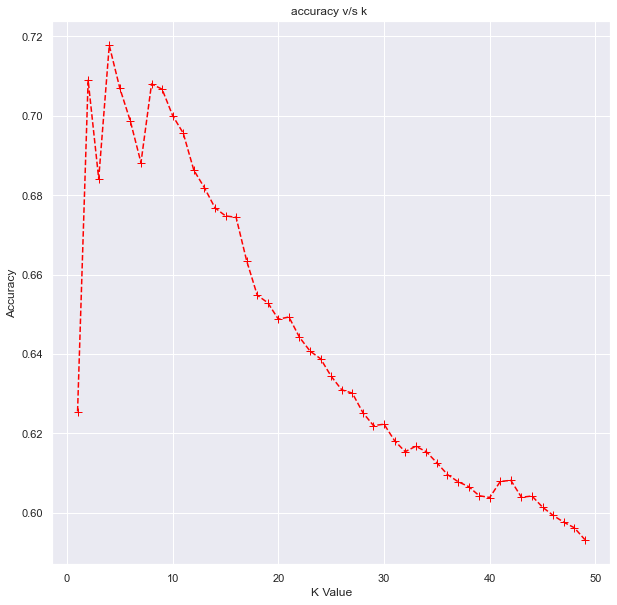

In [229]:
plt.figure(figsize = (10,10))
plt.plot(range(1,50) , accuracy_k , color = 'red' , marker = '+' ,
        linestyle = 'dashed' , markerfacecolor = 'blue' , markersize = 8)
plt.title('accuracy v/s k ')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

We can observe the maximum accuracy for K Value 05

In [230]:
knn = KNeighborsRegressor(n_neighbors= 5)
knn.fit(x_train , y_train)
y_pred_train_knn = knn.predict(x_train)
y_pred_test_knn = knn.predict(x_test)

In [231]:
training_score_knn = r2_score(y_train , y_pred_train_knn)
testing_score_knn = r2_score(y_test , y_pred_test_knn)
print('train_accuracy_knn :', r2_score(y_train , y_pred_train_knn))
print()
print('test_accuracy_knn: ' , r2_score(y_test , y_pred_test_knn))

train_accuracy_knn : 0.7497015037393859

test_accuracy_knn:  0.7068789426696542


In [232]:
MAE_KNN = metrics.mean_absolute_error(y_test , y_pred_test_knn)
MAPE_KNN = (metrics.mean_absolute_error(y_test ,y_pred_test_knn))/100
MSE_KNN = metrics.mean_squared_error(y_test , y_pred_test_knn)
RMSE_KNN = np.sqrt(metrics.mean_squared_error(y_test , y_pred_test_knn))
print("MAE_KNN :" , MAE_KNN)
print("MAPE_KNN :" , MAPE_KNN)
print("MSE_KNN:" , MSE_KNN)
print("RMSE_KNN :" , RMSE_KNN)

MAE_KNN : 30.102533732317738
MAPE_KNN : 0.3010253373231774
MSE_KNN: 4480.950899732861
RMSE_KNN : 66.93990513686781


# SVM REGRESSOR

In [233]:
from sklearn.svm import SVR

In [234]:
SVM = SVR()

In [235]:
SVM.fit(x_train , y_train)
y_pred_train_svm = SVM.predict(x_train)
y_pred_test_svm = SVM.predict(x_test)

training_score_svm = r2_score(y_train , y_pred_train_svm)
testing_score_svm = r2_score(y_test , y_pred_test_svm)
print('train_accuracy_svm :', r2_score(y_train , y_pred_train_svm))
print()
print('test_accuracy_svm: ' , r2_score(y_test , y_pred_test_svm))

train_accuracy_svm : 0.39468296155874216

test_accuracy_svm:  0.34787070502637596


In [236]:
MAE_SVM = metrics.mean_absolute_error(y_test , y_pred_test_svm)
MAPE_SVM = (metrics.mean_absolute_error(y_test ,y_pred_test_svm))/100
MSE_SVM = metrics.mean_squared_error(y_test ,y_pred_test_svm)
RMSE_SVM = np.sqrt(metrics.mean_squared_error(y_test , y_pred_test_svm))
print("MAE_SVM :" , MAE_SVM)
print("MAPE_SVM :" , MAPE_SVM)
print("MSE_SVM:" , MSE_SVM)
print("RMSE_SVM :" , RMSE_SVM)

MAE_SVM : 32.407139436048645
MAPE_SVM : 0.32407139436048643
MSE_SVM: 9969.121214519091
RMSE_SVM : 99.84548670079731


# GRADIENT BOOSTING

In [237]:
from sklearn.ensemble import GradientBoostingRegressor
gdb = GradientBoostingRegressor()
gd_boost = gdb.fit(x_train,y_train)
y_pred_train_gd_boost = gdb.predict(x_train)
y_pred_test_gd_boost = gdb.predict(x_test)
training_score_gdb = r2_score(y_train , y_pred_train_gd_boost)
testing_score_gdb = r2_score(y_test , y_pred_test_gd_boost)
print('train_accuracy_gd', r2_score(y_train , y_pred_train_gd_boost))
print()
print('test_accuracy_gd', r2_score(y_test , y_pred_test_gd_boost))

train_accuracy_gd 0.8389429498300727

test_accuracy_gd 0.7713976988317127


In [238]:
MAE_GDB = metrics.mean_absolute_error(y_test , y_pred_test_gd_boost)
MAPE_GDB = (metrics.mean_absolute_error(y_test ,y_pred_test_gd_boost))/100
MSE_GDB = metrics.mean_squared_error(y_test ,y_pred_test_gd_boost)
RMSE_GDB = np.sqrt(metrics.mean_squared_error(y_test , y_pred_test_gd_boost))
print("MAE_GDB :" , MAE_GDB)
print("MAPE_GDB :" , MAPE_GDB)
print("MSE_GDB :" , MSE_GDB)
print("RMSE_GDB  :" , RMSE_GDB)

MAE_GDB : 26.105132289017106
MAPE_GDB : 0.2610513228901711
MSE_GDB : 3494.6506280734257
RMSE_GDB  : 59.11557009852333


# XG BOOST

In [239]:
from xgboost import XGBRegressor

In [264]:
xgb = XGBRegressor()
xg = xgb.fit(x_train,y_train)
y_pred_train_xg = xgb.predict(x_train)
y_pred_test_xg = xgb.predict(x_test)
training_score_xg = r2_score(y_train , y_pred_train_xg)
testing_score_xg = r2_score(y_test , y_pred_test_xg)
print('train_accuracy_xg', r2_score(y_train , y_pred_train_xg))
print()
print('test_accuracy_xg', r2_score(y_test , y_pred_test_xg))

train_accuracy_xg 0.923226357866602

test_accuracy_xg 0.845838326052699


In [260]:
MAE_XGB = metrics.mean_absolute_error(y_test , y_pred_test_xg)
MAPE_XGB = (metrics.mean_absolute_error(y_test ,y_pred_test_xg))/100
MSE_XGB = metrics.mean_squared_error(y_test ,y_pred_test_xg)
RMSE_XGB = np.sqrt(metrics.mean_squared_error(y_test , y_pred_test_xg))
print("MAE_XGB :" , MAE_XGB)
print("MAPE_XGB :" , MAPE_XGB)
print("MSE_XGB :" , MSE_XGB)
print("RMSE_XGB  :" , RMSE_XGB)

MAE_XGB : 21.79211027732741
MAPE_XGB : 0.2179211027732741
MSE_XGB : 2356.674398864373
RMSE_XGB  : 48.54559093125114


In [275]:
list1 = ['LR_UNSCALED' , 'LR_SCALED' ,'LR_OLS', 'LASSO' , 'RIDGE' , 'GRADIENT DESCENT' , 'DECISION TREE' , 'RANDOM FOREST' , 'KNN' , 'SVM' , 'GRADIENT BOOSTING' , 'XGBOOST']
list2 = [ training_accuracy , training_accuracy1 , training_score_ols , training_score_lasso ,training_score_ridge, training_score_GD ,training_score_dtree ,training_score_rf,
          training_score_knn , training_score_svm , training_score_gdb , training_score_xg]

list3 = [ testing_accuracy , testing_accuracy1 , testing_score_ols , testing_score_lasso ,testing_score_ridge, testing_score_GD ,testing_score_dtree ,testing_score_rf,
          testing_score_knn , testing_score_svm , testing_score_gdb , testing_score_xg]

list4 = [MAE_LRU ,MAE_LRS , MAE_OLS ,MAE_lasso , MAE_ridge , MAE_GD , MAE_DTREE , MAE_RF , MAE_KNN , MAE_SVM , MAE_GDB , MAE_XGB ]
list5 = [MSE_LRU ,MSE_LRS , MSE_OLS ,MSE_lasso , MSE_ridge , MSE_GD , MSE_DTREE , MSE_RF , MSE_KNN , MSE_SVM , MSE_GDB , MSE_XGB ]

In [276]:
r2_score_df = pd.DataFrame({'Algorithm' : list1 ,  'Training_r2_score' : list2 , 'Testing_r2_score' : list3 , 'MAE' : list4 ,'MSE' : list5})
print(r2_score_df)


            Algorithm  Training_r2_score  Testing_r2_score            MAE  \
0         LR_UNSCALED       7.752824e-01     -8.564215e+00      35.468134   
1           LR_SCALED      -1.851811e+06     -1.573444e+06  137148.182189   
2              LR_OLS       7.741954e-01      7.596548e-01      26.916179   
3               LASSO       7.288153e-01      7.258223e-01      29.102269   
4               RIDGE       7.749047e-01      7.602384e-01      26.525505   
5    GRADIENT DESCENT       7.697289e-01      7.566996e-01      27.350844   
6       DECISION TREE       6.113754e-01      5.811042e-01      30.342769   
7       RANDOM FOREST       9.450334e-01      7.806034e-01      25.309192   
8                 KNN       7.497015e-01      7.068789e-01      30.102534   
9                 SVM       3.946830e-01      3.478707e-01      32.407139   
10  GRADIENT BOOSTING       8.389429e-01      7.713977e-01      26.105132   
11            XGBOOST       9.232264e-01      8.458383e-01      21.792110   

In [278]:
!pip install tabulate

In [279]:
from tabulate import tabulate


print(tabulate(r2_score_df, headers = 'keys', tablefmt = 'psql'))

+----+-------------------+---------------------+--------------------+-------------+------------------+
|    | Algorithm         |   Training_r2_score |   Testing_r2_score |         MAE |              MSE |
|----+-------------------+---------------------+--------------------+-------------+------------------|
|  0 | LR_UNSCALED       |         0.775282    |       -8.56421     |     35.4681 | 146208           |
|  1 | LR_SCALED         |        -1.85181e+06 |       -1.57344e+06 | 137148      |      2.40533e+10 |
|  2 | LR_OLS            |         0.774195    |        0.759655    |     26.9162 |   3674.17        |
|  3 | LASSO             |         0.728815    |        0.725822    |     29.1023 |   4191.36        |
|  4 | RIDGE             |         0.774905    |        0.760238    |     26.5255 |   3665.24        |
|  5 | GRADIENT DESCENT  |         0.769729    |        0.7567      |     27.3508 |   3719.34        |
|  6 | DECISION TREE     |         0.611375    |        0.581104    |    

In [294]:
r2_score_df.to_excel('output.xlsx')

In [281]:
r2_df = pd.DataFrame({'Algorithm' : list1 ,  'Training_r2_score' : list2 , 'Testing_r2_score' : list3})

In [284]:
print(tabulate(r2_df, headers = 'keys', tablefmt = 'psql'))

+----+-------------------+---------------------+--------------------+
|    | Algorithm         |   Training_r2_score |   Testing_r2_score |
|----+-------------------+---------------------+--------------------|
|  0 | LR_UNSCALED       |         0.775282    |       -8.56421     |
|  1 | LR_SCALED         |        -1.85181e+06 |       -1.57344e+06 |
|  2 | LR_OLS            |         0.774195    |        0.759655    |
|  3 | LASSO             |         0.728815    |        0.725822    |
|  4 | RIDGE             |         0.774905    |        0.760238    |
|  5 | GRADIENT DESCENT  |         0.769729    |        0.7567      |
|  6 | DECISION TREE     |         0.611375    |        0.581104    |
|  7 | RANDOM FOREST     |         0.945033    |        0.780603    |
|  8 | KNN               |         0.749702    |        0.706879    |
|  9 | SVM               |         0.394683    |        0.347871    |
| 10 | GRADIENT BOOSTING |         0.838943    |        0.771398    |
| 11 | XGBOOST      

In [292]:
r2_df.to_excel('output.xlsx')

AxesSubplot(0.125,0.125;0.775x0.755)


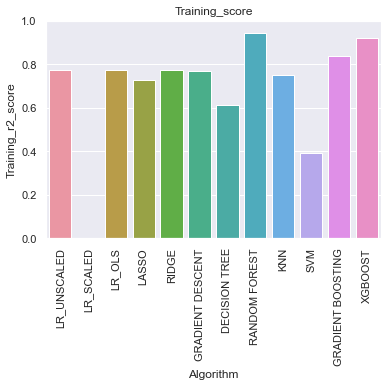

In [254]:

charts = sns.barplot(x = 'Algorithm' , y = 'Training_r2_score' , data = r2_score_df)
charts.set_xticklabels(charts.get_xticklabels() , rotation = 90)
plt.title('Training_r2_score')
plt.ylim(-0 , 1)
print(charts)

AxesSubplot(0.125,0.125;0.775x0.755)


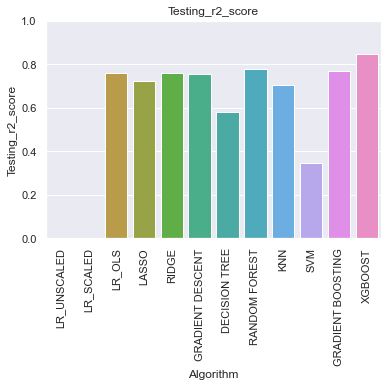

In [257]:
charts = sns.barplot(x = 'Algorithm' , y = 'Testing_r2_score' , data = r2_score_df)
charts.set_xticklabels(charts.get_xticklabels() , rotation = 90)
plt.title('Testing_r2_score')
plt.ylim(-0 , 1)
print(charts)

In [262]:
# CROSS VALIDATION FOR XGBOOST 
from sklearn.model_selection import cross_val_score
training_score_cv_val = cross_val_score(xgb , x_train , y_train , cv =10)
testing_score_cv_val = cross_val_score(xgb , x_test , y_test , cv = 10 )
print('training_score for CV :',training_score_cv_val.mean() )
print()
print('testing_score for CV :' , testing_score_cv_val.mean())

training_score for CV : [0.68076703 0.57015811 0.5859766  0.5842527  0.8789381  0.69646373
 0.77831877 0.79836852 0.68025898 0.7024561 ]

testing_score for CV : [0.78382174 0.85142231 0.6104105  0.71293325 0.87865891 0.92198071
 0.72668825 0.61513911 0.69822193 0.56209535]


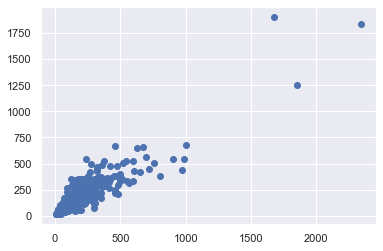

In [265]:
plt.scatter(y_test , y_pred_test_xg)
plt.show()
plt.title(y_test v/s y_pred_test_xg)

<AxesSubplot:xlabel='new_sqft', ylabel='price'>

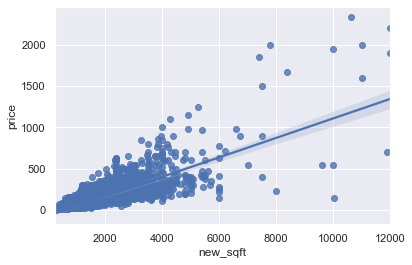

In [267]:
sns.regplot(x = 'new_sqft' , y = 'price' , data = new_df3)

From Above observations from the chart , r2_score , and evaluation table , We can conclude that 
XG Boost is a better model with below performance metrics 

In [280]:
print('train_accuracy_xg', r2_score(y_train , y_pred_train_xg))
print()
print('test_accuracy_xg', r2_score(y_test , y_pred_test_xg))
print('_______________________________________________')
print("MAE_XGB :" , MAE_XGB)
print("MAPE_XGB :" , MAPE_XGB)
print("MSE_XGB :" , MSE_XGB)
print("RMSE_XGB  :" , RMSE_XGB)

train_accuracy_xg 0.923226357866602

test_accuracy_xg 0.845838326052699
_______________________________________________
MAE_XGB : 21.79211027732741
MAPE_XGB : 0.2179211027732741
MSE_XGB : 2356.674398864373
RMSE_XGB  : 48.54559093125114
